In [1]:
%load_ext autoreload
%autoreload 2
%aimport -graph_registry  # Exclude from autoreload!

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from ipykernel import get_connection_file
print(get_connection_file())

/home/xd/.local/share/jupyter/runtime/kernel-c0573522-4711-4f48-b9f7-4eb8148f5f65.json


In [360]:
import sys
import os
import json
from pathlib import Path
import random
from collections import Counter, OrderedDict
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('/home/xd/projects/transformers/notebooks')
from common_utils import join_lists

from seeds.common import Color, show_colored_grid, show_colored_grid_combined, show_examples
from seeds.test import color_names
from arc_analysis import *

In [ ]:
summaries_dir = Path('/data0/devbox_data/lixinyu/NVARC/artifacts-puzzles/summaries/')
df = pd.read_parquet(summaries_dir)
df.head()

,summary_name,puzzle_name,model_name,reasoning_level,prompt,reasoning,completion
0,summary1,00576224,claude-sonnet-4-20250514,no,You are an AI specialized in designing and ana...,,<puzzle_analysis>\n\nLet me analyze the input ...
1,summary1,009d5c81,claude-sonnet-4-20250514,no,You are an AI specialized in designing and ana...,,<puzzle_analysis>\n\nLet me analyze the input ...
2,summary1,00d62c1b,claude-sonnet-4-20250514,no,You are an AI specialized in designing and ana...,,<puzzle_analysis>\n\nLet me analyze the input ...
3,summary1,00dbd492,claude-sonnet-4-20250514,no,You are an AI specialized in designing and ana...,,<puzzle_analysis>\n\nLet me analyze the input ...
4,summary1,017c7c7b,claude-sonnet-4-20250514,no,You are an AI specialized in designing and ana...,,<puzzle_analysis>\n\nLet me first examine the ...


In [245]:
df['summary_name'].value_counts()

summary6    1000
summary1     716
summary3     715
summary2     712
summary5      91
summary4      29
Name: summary_name, dtype: int64

In [289]:
inputs_dir = Path('/data0/devbox_data/lixinyu/NVARC/artifacts-puzzles/inputs/')
dfi = pd.read_parquet(inputs_dir)
dfi.head()

,mix_name,summary_name1,summary_name2,puzzle_name1,puzzle_name2,model_name,reasoning_level,prompt,reasoning,completion
0,mix1,summary1,summary1,00576224,1c02dbbe,gpt-oss-120b,medium,You are an AI specialized in designing and ana...,We need to produce answer: first analysis and ...,**Analysis & Design**\n\nBelow is a step‑by‑st...
1,mix1,summary1,summary1,00576224,551d5bf1,gpt-oss-120b,medium,You are an AI specialized in designing and ana...,We need to produce answer: analysis and final....,**Analysis & Design**\n\nBelow is a step‑by‑st...
2,mix1,summary1,summary1,00576224,84db8fc4,gpt-oss-120b,medium,You are an AI specialized in designing and ana...,We need to produce analysis then final code. T...,**Analysis**\n\nBelow is a step‑by‑step breakd...
3,mix1,summary1,summary1,009d5c81,0e671a1a,gpt-oss-120b,medium,You are an AI specialized in designing and ana...,"We need to write an analysis first, then code....",**Analysis & Design Plan**\n\nBelow is a step‑...
4,mix1,summary1,summary1,009d5c81,4e45f183,gpt-oss-120b,medium,You are an AI specialized in designing and ana...,We need to provide analysis then code. The use...,**Analysis & Design**\n\nBelow is a step‑by‑st...


In [320]:
dfi[(dfi['summary_name1'] == 'summary4')].groupby('summary_name2').size()

summary_name2
summary2    16306
summary3     4259
dtype: int64

In [290]:
dfi['mix_name'].value_counts()

mix9     90988
mix3     18295
mix2     16424
mix4     13591
mix1     13155
mix6     12045
mix5     10976
mix10     9799
mix7      4261
mix8      4259
Name: mix_name, dtype: int64

In [297]:
mixtures_dir = Path('/data0/devbox_data/lixinyu/NVARC/artifacts-puzzles/mixtures/')
dfm = pd.read_parquet(mixtures_dir)
dfm.head()

,mix_name,summary_name1,summary_name2,puzzle_name1,puzzle_name2,model_name,reasoning_level,prompt,reasoning,completion
0,mix1,summary1,summary1,00576224,1c02dbbe,claude-sonnet-4-20250514,no,You are an advanced AI system specialized in c...,,<puzzle_analysis>\n\nLet me analyze the key el...
1,mix1,summary1,summary1,00576224,551d5bf1,claude-sonnet-4-20250514,no,You are an advanced AI system specialized in c...,,<puzzle_analysis>\n\nLet me analyze the key el...
2,mix1,summary1,summary1,00576224,84db8fc4,claude-sonnet-4-20250514,no,You are an advanced AI system specialized in c...,,<puzzle_analysis>\n\nLet me analyze the key el...
3,mix1,summary1,summary1,009d5c81,0e671a1a,claude-sonnet-4-20250514,no,You are an advanced AI system specialized in c...,,<puzzle_analysis>\n\nLet me analyze the key el...
4,mix1,summary1,summary1,009d5c81,4e45f183,claude-sonnet-4-20250514,no,You are an advanced AI system specialized in c...,,<puzzle_analysis>\n\nLet me analyze the key el...


In [ ]:
print(dfm[(dfm['summary_name1'] == 'summary4') & (dfm['puzzle_name1'] == '142ca369')].iloc[0]['prompt'])

In [369]:
d = json.load(open(os.path.join(synthetic_dir, fpath)))

In [371]:
len(d)

30

142ca369_e9ac8c9e.json


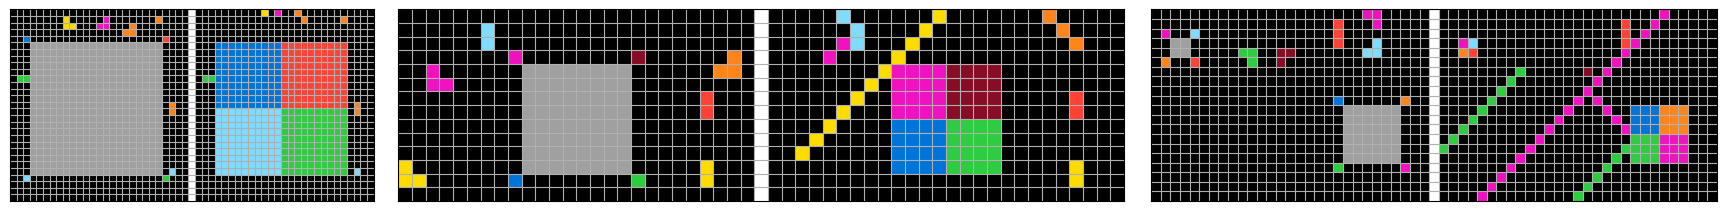

142ca369_626c0bcc.json


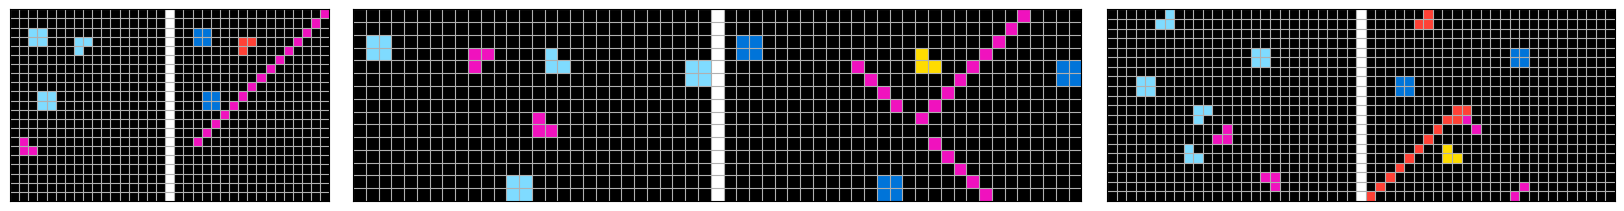

142ca369_ef135b50.json


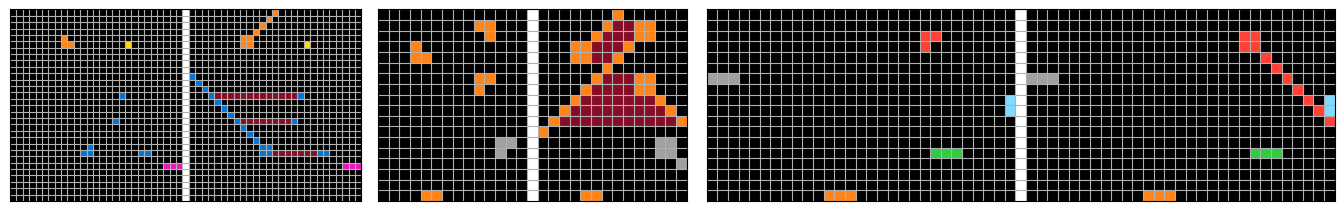

In [ ]:
pid = '142ca369'
# pid = '16b78196'
synthetic_dir = '/data0/devbox_data/lixinyu/NVARC/synthetic-puzzles/nvarc_full/' + pid
for fpath in random.sample(os.listdir(synthetic_dir), 3):
    print(fpath)
    section = Section(pid, json.load(open(os.path.join(synthetic_dir, fpath))))
    show_examples(section.examples[:3])

In [300]:
dfm['model_name'].value_counts()

gpt-oss-120b                238593
claude-sonnet-4-20250514     28000
Name: model_name, dtype: int64

In [339]:
# puzzle_ids = df[df['summary_name'] == 'summary4']['puzzle_name'].tolist()  # 29 manual
puzzle_ids = df[df['summary_name'] == 'summary5']['puzzle_name'].tolist()  # 91 claude sonnet 4.5

In [378]:
print(df[df['summary_name'] == 'summary5'].iloc[0]['prompt'])

Here is the puzzle you need to analyze:

<puzzle>
<pair_1>
<input>
- Input height: 30
- Input width: 30
- Input unique colors: [1, 2, 3, 4, 5, 6, 7, 8, 9]
- Input grid:
353366541499439999349941456633
533366454199349119439914546633
113554669114994554994119664553
115345661941914444191491665435
699935334399926996299934335399
969953333491999669991943333599
996911359944699229964499531196
999611539154969999694519351169
149143995572432442342755993419
411934914527344224437254194391
991499456455244334425546549941
994191444545423443245454441914
439999695977557227557795969999
349129969577452772547759699219
994469997759545555459577988884
915496297795464554645977988885
915496297795464554645977988885
994469997759545555459577988884
349129969577452772547759688889
439999695977557227557795988889
994191444545423443245454488884
991499456455244334425546588881
411934914527344224437254188881
149143995572432442342755993419
999611539154969999694519351169
996911359944699229964499531196
9699533334919996699919433

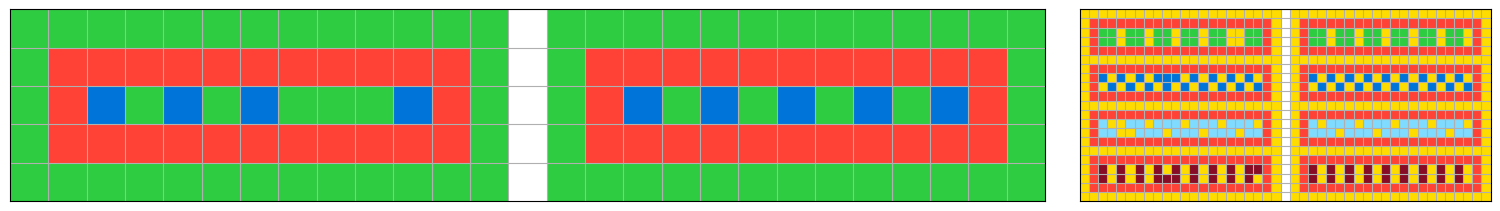

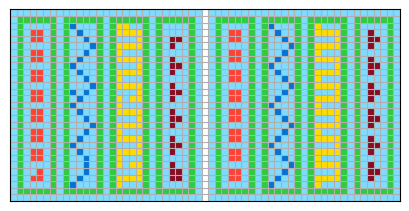

135a2760 <rules_summary>
A transformation based on symmetry reconstruction. The main task is to reconstruct symmetric patterns within the input grid.
</rules_summary>

<input_generation>
The input grid may contain several unique patterns, each separated by a frame. Inside the frame is one "corrupted" pattern. A typical pattern is a regularly repeating pixel horizontally or vertically. The pattern looks like an ornament with unique repeated elements. The corruption is implemented by adding noisy pixels to this pattern, or removing some pixels from it.
</input_generation>

<solution_steps>
1. Find areas with unique patterns separated by frames.
2. In each frame, identify common repeating elements and pixels.
3. Identify noise or missing pixels.
4. Restore a symmetrically repeating pattern in each frame.
</solution_steps>

<key_insight>
Reconstruct multiple repeating symmetrical patterns.
</key_insight>

<puzzle_concepts>
- symmetry
- repetition
- noise
- reconstruction
</puzzle_concepts>

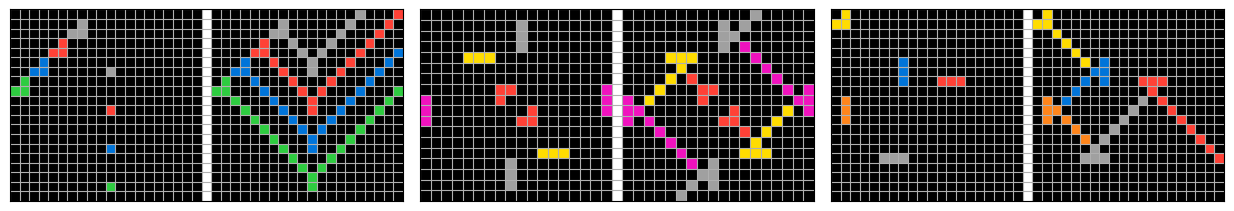

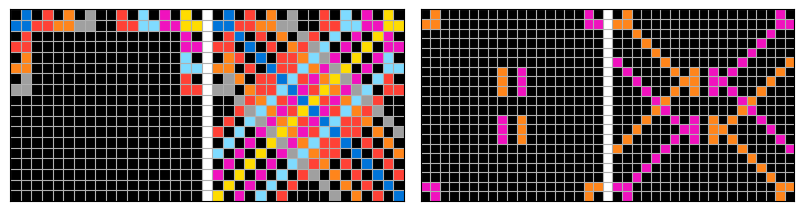

142ca369 <rules_summary>
To transform input grid, you need to draw a ray from the starting point specified by the arrow. But there are obstacles (walls) that change the color and direction of the ray.
</rules_summary>

<input_generation>
The input grid consists of two types of objects: triangles consisting of three pixels (arrows), and straight blocks (walls) consisting of one or more pixels (up to 3).
</input_generation>

<solution_steps>
1. Find the starting points (triangle objects).
2. Draw lines along the arrow formed by the triangle. The initial line color defined by the color of arrow. The line is always drawn diagonally.
3. If the line touches the block, it changes color to the wall color and also changes direction, bouncing off the wall (at 45 degrees).
</solution_steps>

<key_insight>
Arrows indicate the direction and the walls reflect the beam.
</key_insight>

<puzzle_concepts>
- object detection
- line drawing
- bounce trajectory
- objects interaction
</puzzle_concepts>


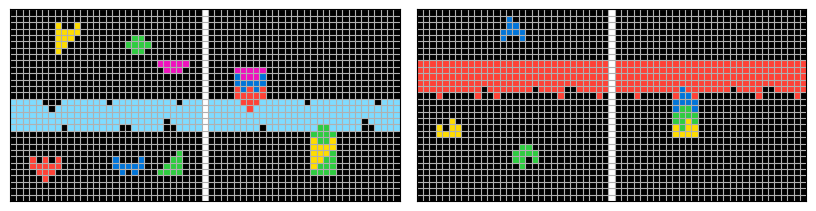

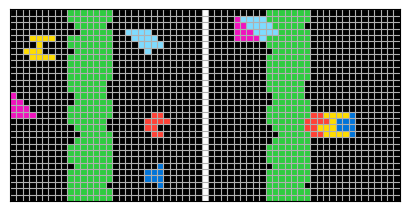

16b78196 <rules_summary>
The main rule is to move and connect colored figures with each other. The goal is to leave as few holes as possible. Some figures fill the holes in the main block, others fill each other's holes.
</rules_summary>

<input_generation>
The input grid includes a main magnetic block with unique holes on the edges. The block is located in the center of the input grid. It has a rectangular shape and can be positioned vertically or horizontally. On both sides of this block, several colored figures are scattered randomly in the free space. These figures are much smaller, and some of them fit perfectly into the holes of the block. Other figures can be inserted or connected to each other. This process of assembly and connection is similar to the principle of "testris", when figures are stacked on top of each other.
</input_generation>

<solution_steps>
1. Find the main block located in the center of the input grid.
2. Identify the holes on the edges of this block on both 

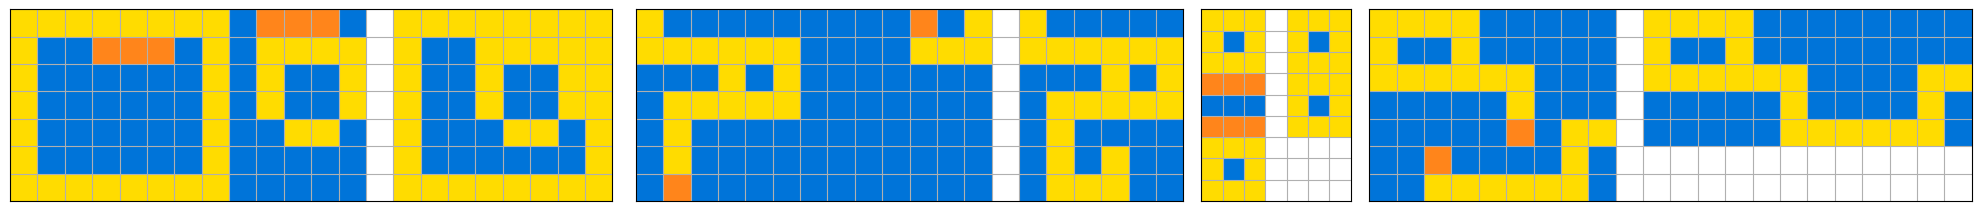

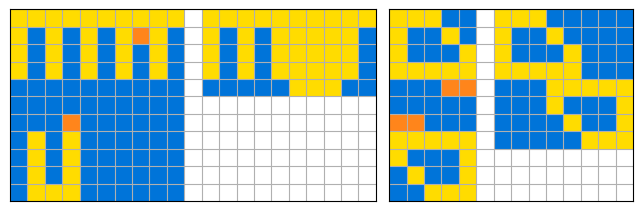

20270e3b <rules_summary>
The basic rule for transforming the input grid is to connect two objects to each other using connection pixels. The new connected object will have a different size, which determines the size of the output grid. Touch control pixels are removed after connecting.
</rules_summary>

<input_generation>
There are two objects in the input grid. The shapes of the objects vary greatly. Sometimes it is a frame with several holes inside, sometimes it is a curved line with many gaps. Each object has 1 to 3 control pixels, the color of which differs from the color of the object itself. These control pixels show the point of contact between the two objects. An important constraint on the shape of the objects is that when two objects touch, the objects do not overlap between each other. Only control pixels overlaps.
</input_generation>

<solution_steps>
1. Find two separate objects of the same color. Each object must have few control pixels of different color.
2. Move and con

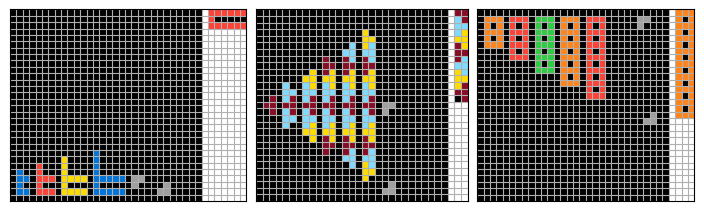

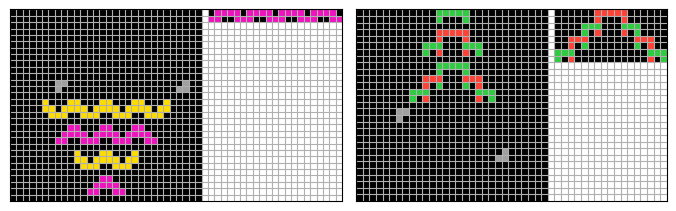

20a9e565 <rules_summary>
The transformation rule consists of reconstructing the invisible part of the scene marked with special markers. It is necessary to understand the input pattern, continue the pattern to the markers and draw the continuation only inside this specially marked window.
</rules_summary>

<input_generation>
The large input grid contains a partially drawn repeating pattern. There is a repeating pattern of small elements. These elements can be lines, blocks, random small shapes. The key property of this pattern is repetition. In addition, there is a marked frame or window. The markers look like two small corners of an invisible frame. These two corners define a special area used to depict the repeating pattern. This means that the markers are placed in the direction of repetition.
</input_generation>

<solution_steps>
1. Identify the pattern of repetition and its main elements.
2. Find the two corner markers that define the area of ​​special reconstruction.
3. Fill this

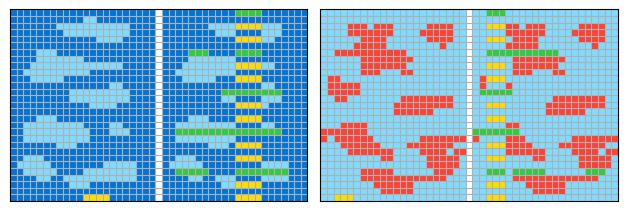

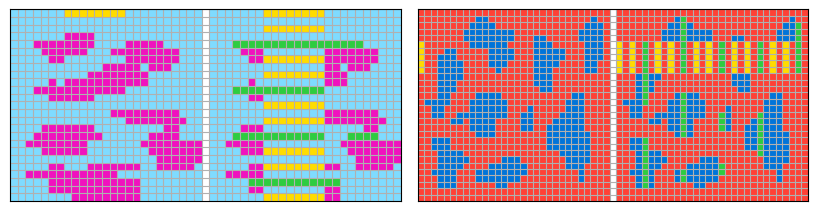

221dfab4 <rules_summary>
A transform rule is defined as drawing a repeating pattern of two lines and changing the color of any overlapping objects based on a specific rule. This rule depends on the color of the lines. One color does nothing, the other color of the line changes or fills the pixels of any object on the same level.
</rules_summary>

<input_generation>
The large input grid includes several differently shaped objects, such as a cloud. In addition, there is one short line of pixels at the edge of the input grid. It is important to note that the clouds do not touch the edges of the grid. This short line defines the starting position of the repeating pattern. The repeating pattern consists of an interchangeable set of two lines. The lines are the same length (3-8 pixels), but two different colors. The lines are also separated by one pixel. This color plays an important role in how the repeating pattern will affect the objects in the grid. The first color (the color of the firs

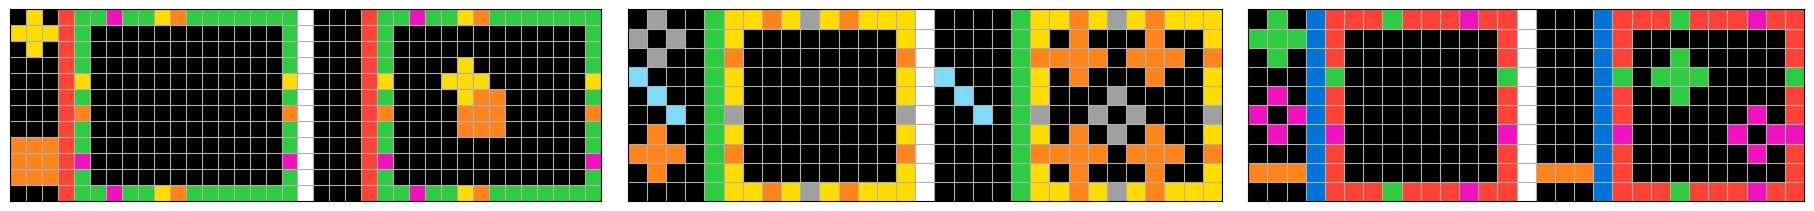

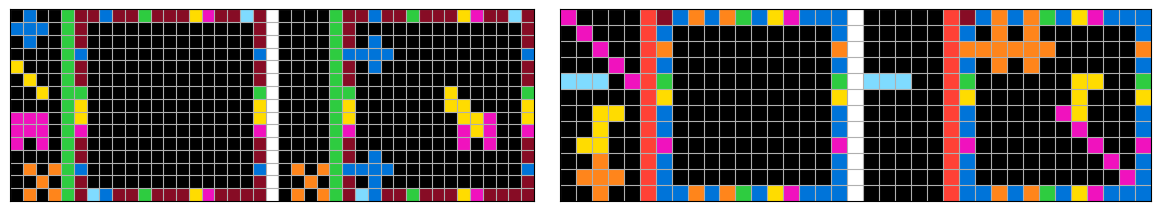

247ef758 <rules_summary>
To transform, you need to recognize building blocks of a special shape and move these blocks to a specific position, indicated by special markers of the same color. 4 pixels in the rectangular frame are used as markers for the new position. The blocks are moved towards the point calculated by the intersection of the lines drawn through these 4 pixels.
</rules_summary>

<input_generation>
The input grid is divided into two areas by a line. The first, smaller area contains small building blocks, such as a cross, a square, or a small irregular shape. These blocks have two types of shapes: 1 - a shape with four pixels left/right, top/bottom, such as a cross; 2 - without four pixels, such as a diagonal line. For example, a square building block would have four pixels at the edges: left/right, top/bottom. The second, larger area is represented by a frame with a border. The border contains special pixels. The color of these pixels sometimes matches the color of the bu

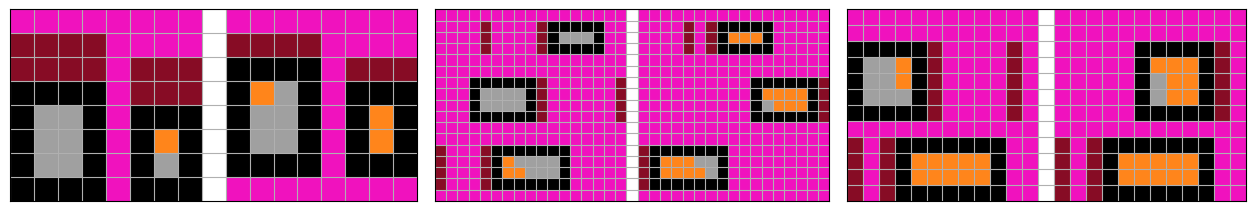

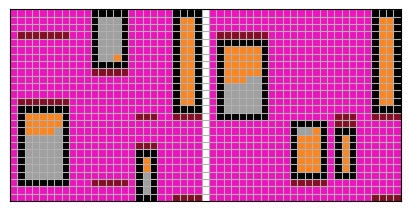

271d71e2 <rules_summary>
The transformation is done in two stages. First, you move the blocks to the control line and count the number of steps taken. Then, you fill the empty pixels inside with a special color, the number of pixels of which is equal to the number of steps taken in the first stage.
</rules_summary>

<input_generation>
The input grid consists of several blocks scattered throughout the grid. These blocks are represented as rectangular frames with empty pixels inside. The empty pixels have a different color than the background and borders of the frame. Each rectangular block has an additional element, such as a line attached to one of its sides. This line is also a different color. The important part of the grid is that there are several more lines in the grid that are logically connected to the block lines. In particular, these individual lines are placed in front of the block on the side to which the line is attached. This means that there is a gap between the block and

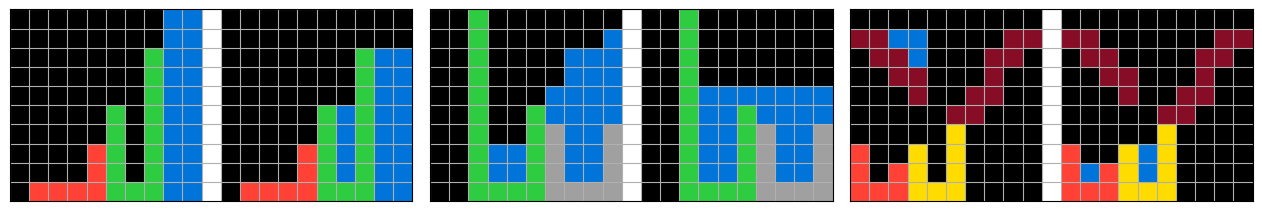

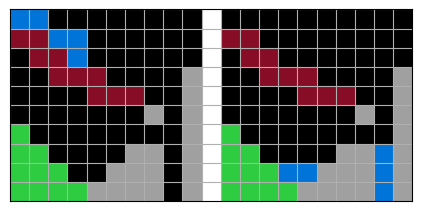

28a6681f <rules_summary>
The transformation is based on the physical principles of gravity and water. You need to move the "water" pixels to the bottom of the grid. This movement requires an understanding of how "water" slides, flows, fill gaps and moves over other objects.
</rules_summary>

<input_generation>
The key element of the input grid are the blue pixels, which represent water at an abstract level. The initial position of these pixels is unnatural, meaning that the water drops will fall to the ground. In addition to the "water" pixels, the input grid contains other random elements such as cups, mugs, lines, barriers, and steps. Some of these objects also hold water pixels. But as mentioned, other water pixels are suspended in the air or stuck to each other and will obey gravity, filling in the objects below.
</input_generation>

<solution_steps>
1. Identify the water pixels and count them, as this will be important in the next steps to determine if the water will fill the gaps

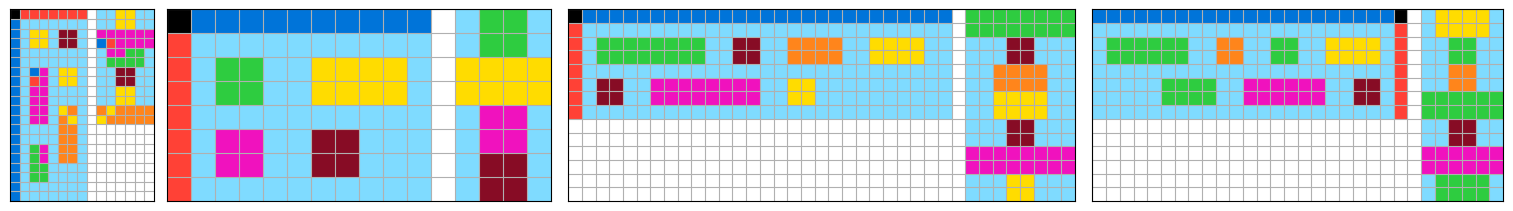

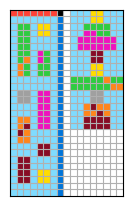

291dc1e1 <rules_summary>
The transformation rules consist of several important sequential steps. First, you need to understand the order of movements by analyzing the control lines and control pixel. Then, you need to rotate the rectangular objects according to the lines. Then, these rectangles need to be moved to the output grid and, finally, they need to be centered horizontally.
</rules_summary>

<input_generation>
There are two control lines that determine the order in which objects move. These lines are located at the edges of the grid: one horizontal, the other vertical. The color of lines is random. For example, red and blue. The blue line determines the first direction of movement, and the red line determines the second. The lines intersect at one point, in the corner marked with a different color. This corner also plays an important role in the movement of objects. In addition to these lines, there are several rectangular objects in the scene. Each rectangle consists of multi-

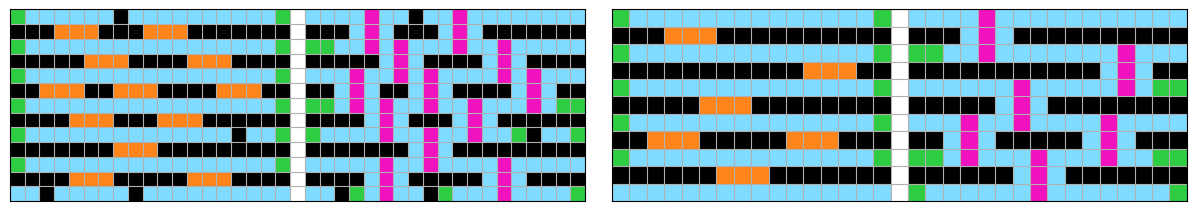

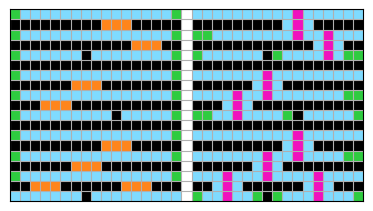

2b83f449 <rules_summary>
The transformation is based on several abstract principles: broken pipes, closed valves (gates), and moving pixels inside the pipes. To create the output grid, a sequence of actions must be performed: 1 - change the state of the valves (from horizontal to vertical, from one color to another), 2 - move special pixels from the edges to the end of the corresponding pipe.
</rules_summary>

<input_generation>
The input grid is presented as a grid of horizontal lines. Some of these lines have holes. The distance between the lines is 1 pixel. At random positions between the lines are short blocks of lines (different color). These short lines look like closed valves or gates. The whole grid looks like a wall with several horizontal broken pipes and several gates between the lines. In addition, there are special pixels on the left and right edges of the grid. These pixels are located on the same level as the pipes. They look like special pixels located inside the pipes.

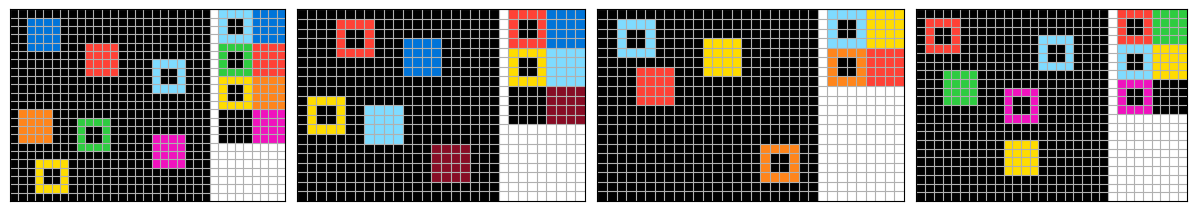

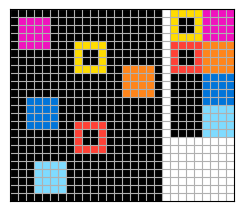

2ba387bc <rules_summary>
The basic rule of transformation is to arrange rectangular objects based on their shape and position.
</rules_summary>

<input_generation>
The input grid contains several square objects, represented as single-color squares or frames with a one-pixel-thick frame and empty space inside. All square objects are 4 pixels in size. These objects are randomly scattered across the input grid. The number of frames and single-color squares can vary, but is about 2–4 objects for each category.
</input_generation>

<solution_steps>
1. Find all solid single-color squares.
2. Find all frames.
3. Sort solid squares by their position on the Y axis.
4. Sort frames by their position on the Y axis.
5. Place all sorted frames vertically, one above the other.
6. Place all solid squares vertically in the second column after the column of frames.
7. If the number of frames differs from the number of solid squares, fill the gap with a black background.
</solution_steps>

<key_insight>


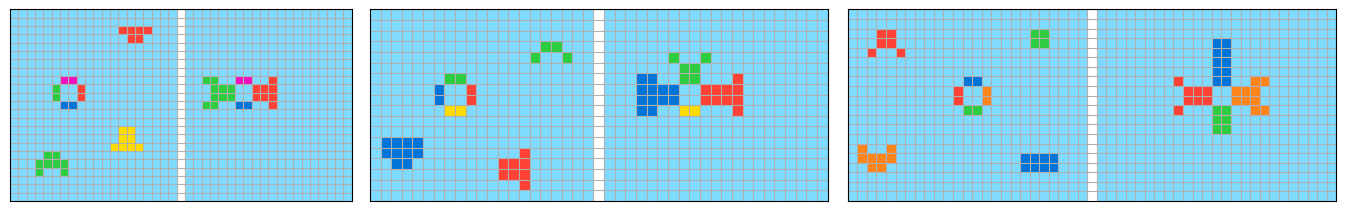

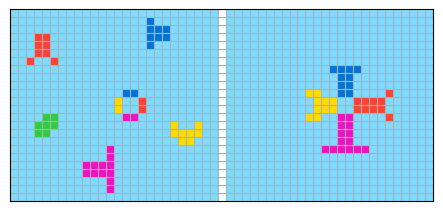

2c181942 <rules_summary>
To transform the input grid, you need to rearrange the objects using a magnetic field. The object in the center of the square attracts other objects of a certain color. The other objects must be correctly attached to the sides of the square. The attached sides of the objects must perfectly match the sides of the square in size and color.
</rules_summary>

<input_generation>
There are several 4-6 objects scattered across a large input grid. One of these objects is a special shape, mostly placed in the center of the grid. This shape does not move and stays in this place. This shape is square in shape and each side of the square has a different color. The square has no corner pixels and is empty inside. The size of the square is small - 3-5 pixels. The other objects are single-color objects, but the color is always different between objects. The shapes of the other objects are also different, but mostly symmetrical. The shapes are irregular, but some of them look 

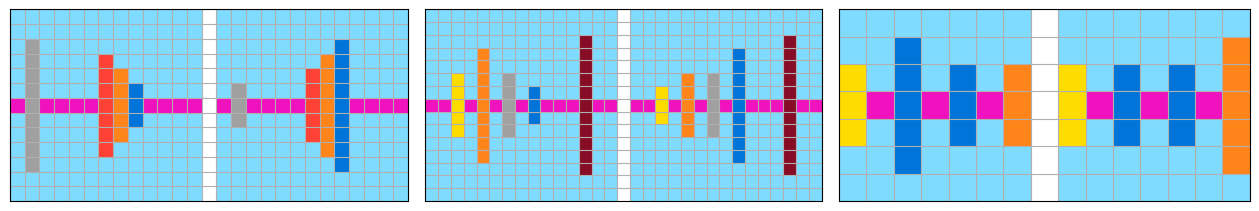

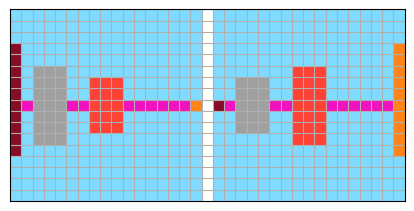

31f7f899 <rules_summary>
The transformation based on sorting and rearranging lines and rectangles. Rearranged objects retain only their shape, but when moved to a new position, they change color to the one that was there before.
</rules_summary>

<input_generation>
The input grid consists of several lines and rectangles. There is one unique horizontal line that serves as a skewer or base for other lines and rectangles. This means that other objects are placed on top of this horizontal line. The X-axis position is random. The Y-axis position is chosen so that the object (line, rectangle) is evenly divided by the horizontal line. This means that all objects are vertically symmetrical about the horizontal line. The color of all objects is different.
</input_generation>

<solution_steps>
1. Find all the vertical objects that are on the same horizontal base line.
2. Remember the color and position of all these objects.
3. Sort all the objects you found by height.
4. Rearrange the objects fr

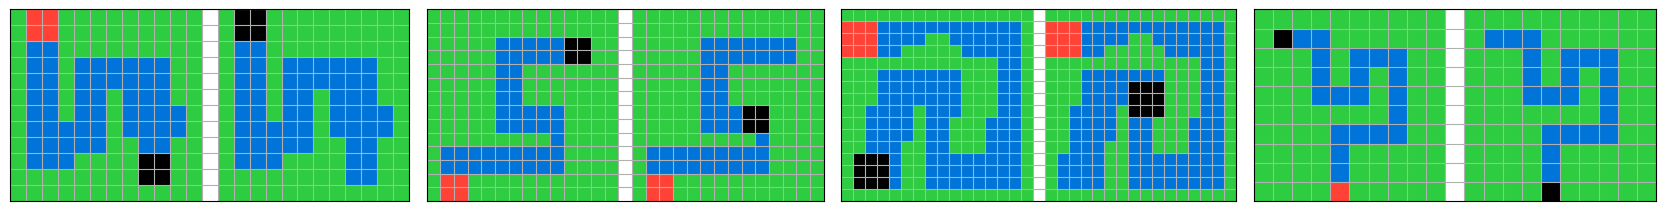

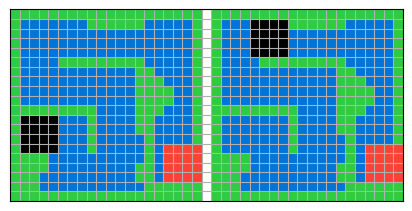

332f06d7 <rules_summary>
The transformation rule is defined simply by moving one object to another, but implementation requires a complex process of modeling the movement of the object along a complex path with turns and angles.
</rules_summary>

<input_generation>
The input grid is one long path or trajectory. This path can be interpreted as a river or a pipe with many turns and bends. In some places the river is wider, in others it is narrower. The path has two clearly defined ends: the start and the end. At these two points there are two squares of different colors. For example, the start square is black and the end square is red. The squares are the same size.
</input_generation>

<solution_steps>
1. Find two squares on the input grid.
2. Determine which squares are moving based on training examples. For example, the black square always changes position on the output grid.
3. Identify a "river" object and carefully analyze the path and trajectory of this river.
4. Simulate a flow t

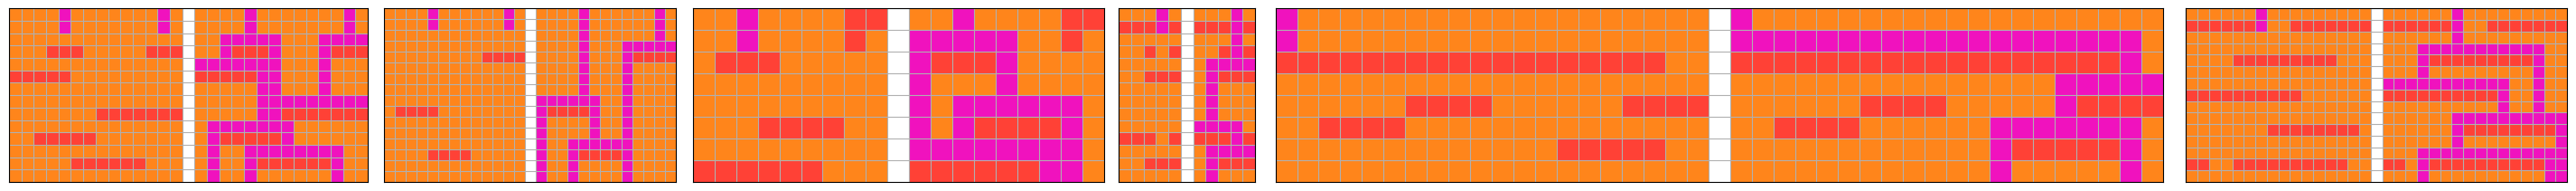

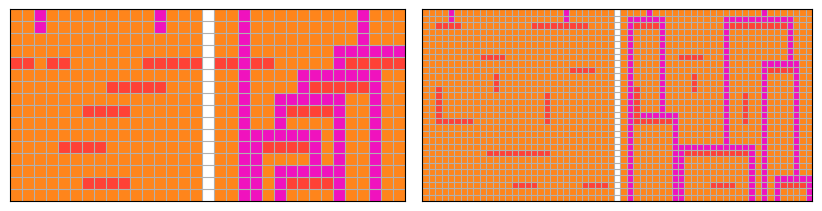

36a08778 <rules_summary>
The transformation is based on a complex process of modeling the fluid flow from top to bottom, avoiding obstacles and branching the flow into multiple streams.
</rules_summary>

<input_generation>
The input grid contains two different types of lines. The input grid has a few horizontal lines scattered around it. These look like shelves or horizontal levels. The second type of line is used as a starting point for the fluid flow. These starting points are simple 1-2 pixels vertical lines. They are located at the top of the grid (like a shower head). There are only 1 or 2 starting points in the grid. The idea is to represent an environment for simulating fluid flow. The fluid will flow from the starting point, slide onto the shelves, splits into streams and fall to the ground.
</input_generation>

<solution_steps>
1. Find the starting points with different colors at the top of the grid.
2. Start the water simulation process. From each starting point, start drawin

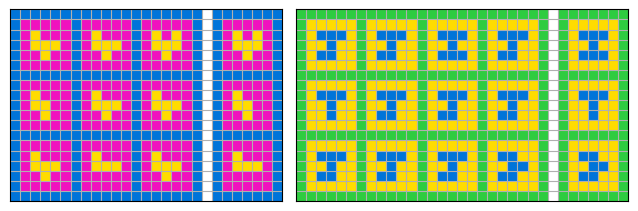

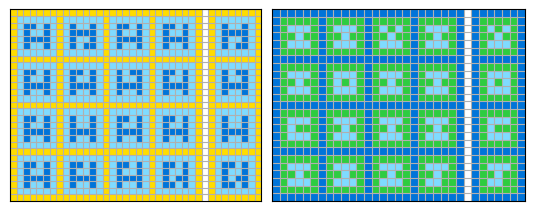

38007db0 <rules_summary>
To transform an input grid represented as a lattice of square objects, you need to identify a unique pattern in each horizontal row and draw only that square with that unique pattern at the corresponding vertical position in the output grid.
</rules_summary>

<input_generation>
The input grid is organized as a lattice of frames. Each frame contains a random pattern of pixels. The frame size is 5 pixels. The lattice size is 3 rows with columns of different sizes (from 3 to 4). Each cell contains a frame with a random pattern. Most of these cells contain the same random pattern, and only 3 frames are unique. Frames separated single color 1-pixel lines. As result the input height is 19 pixels: 3x5 for frames/boxes, 2 for lattice lines between them and 2 lines as lines around all frames. The color of lattice is random and different from color of frames and corresponding random pattern.
</input_generation>

<solution_steps>
1. Identify all random patterns in each ce

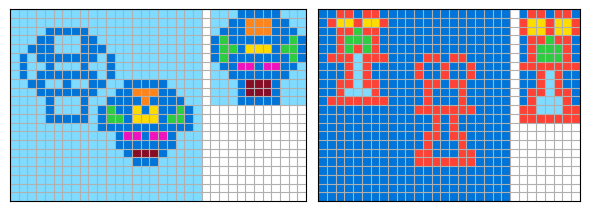

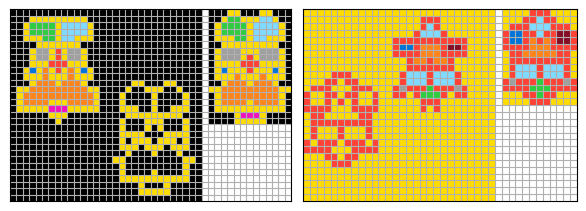

3a25b0d8 <rules_summary>
The transformation consists of several important steps. First, we recognize two objects on the input grid: one with colored holes, the other with empty ones. Then, we use the colors of the first object to fill the corresponding holes in the other object. Finally, we crop the new filled object along the edges.
</rules_summary>

<input_generation>
The input grid includes two complex but similar objects. These objects share a common pattern, but the details are slightly different. For example, one object might have 5 holes in certain positions, while the other object might have exactly the same number of holes in exactly the same positions, but with holes of different sizes. Another important property is that one of these objects fills the holes with different colors. For example, all 5 holes will be filled with different colors. The goal of creating the input grid is to make the two objects fairly similar but different in detail (slightly different shapes and siz

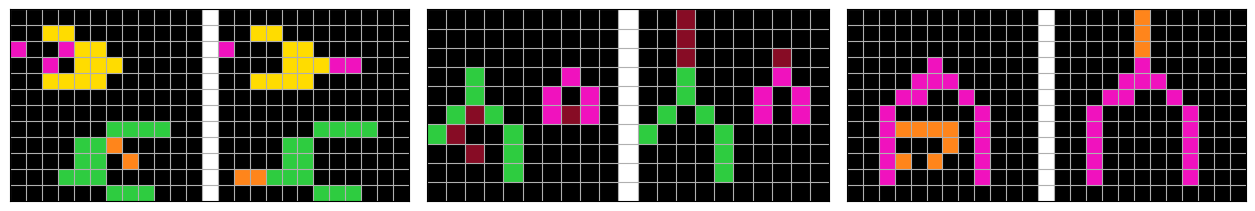

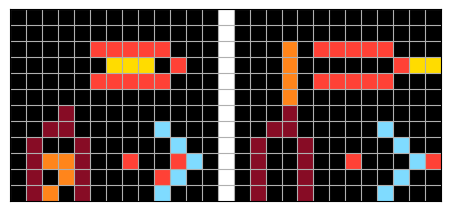

3dc255db <rules_summary>
The transformation is based on two core principles: object recognition and object transformation. Recognition requires an understanding of the object's overall shape, which is defined as a composition of simple elements: a frame, a spike, and random content. Transformation requires an understanding of how the various parts of the shape relate to each other and how to correctly move internal pixels outward from the object.
</rules_summary>

<input_generation>
The input grid includes several randomly scattered objects. Each object has a hollow shape with a sharp tip. This means that on one side of the object there are 1-2 pixels forming the characteristic tip (spike), while the opposite side of the object has no boundary pixels, like a cup. The basic idea behind this complex shape is that each object will have randomly distributed pixels within its hollow shape, and the transformation requires moving these pixels toward the tip. The pixels are randomly placed wit

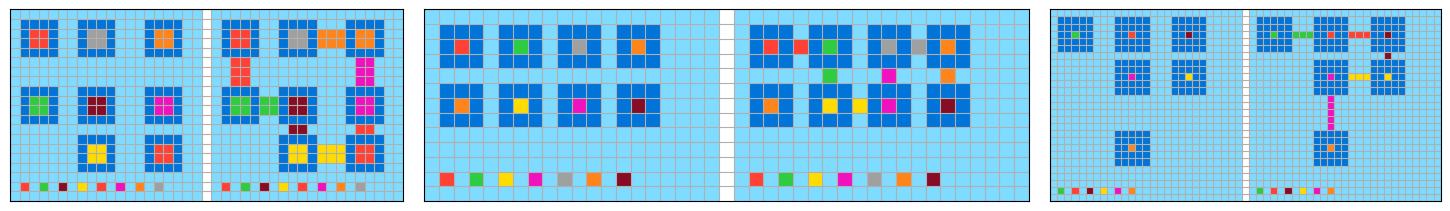

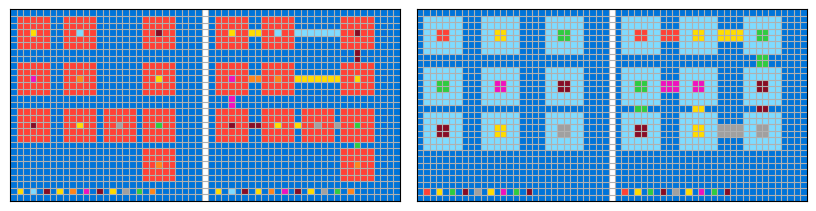

3e6067c3 <rules_summary>
The transformation requires complex, sequential reasoning about the grid structure. First, individual elements must be recognized: square objects and control pixels. Second, the order of the control pixels must be determined and the relationship between the pixel colors and the square colors must be established. Finally, the squares must be connected by drawing connecting bridges. These bridges are located between the square frames and have a width equal to the size of the inner square of the frame (excluding the border pixels). The drawing must be executed in precise accordance with the order of the control pixels at the bottom of the grid.
</rules_summary>

<input_generation>
The input grid is divided into a mesh structure. This mesh structure is used to evenly distribute squares of the same size throughout the grid space. However, the gaps between rows or columns are random. For example, a mesh might have 2 rows and 3 columns, with each row containing 3 squa

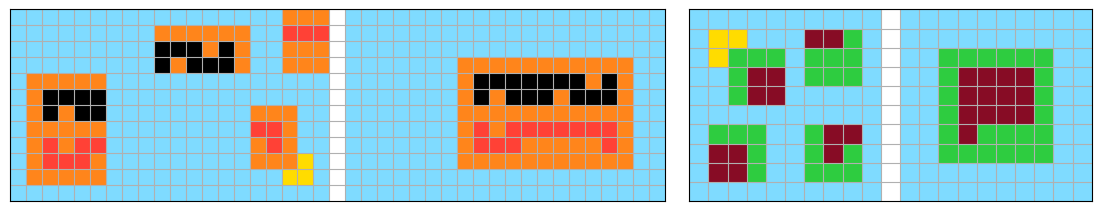

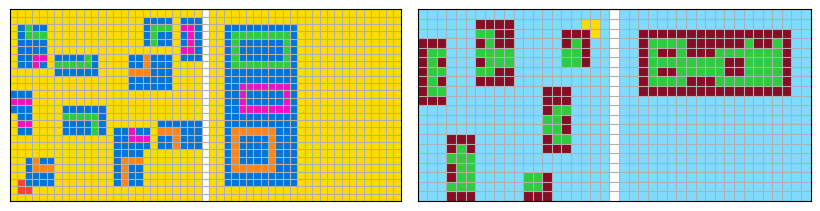

446ef5d2 <rules_summary>
Transformation is defined simply as assembling jigsaw puzzle pieces, but the implementation is complex. First, you need to find the starting point - a rectangular piece with a special marker in its corner. Then, you need to determine the position of this corner, pin it, and begin moving the remaining pieces. To move the remaining pieces, you need to determine the order, find the desired next piece, and attach it to the pinned piece. Continue rearranging the pieces until all the pieces connect and form a single picture.
</rules_summary>

<input_generation>
The input grid consists of scattered jigsaw puzzle pieces. Each puzzle piece is rectangular with a unique pattern within it. The puzzle pieces are randomly placed and differ in color from the background. The primary color of all pieces is the same and differs from the background, making it easier to recognize the pieces. The tricky part of the input grid is the patterns within the pieces. This pattern is cruci

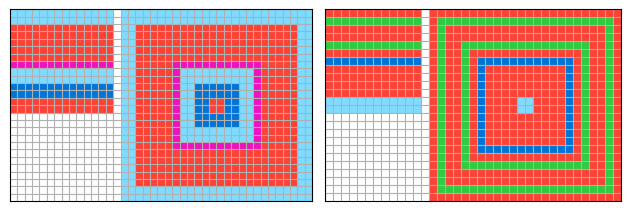

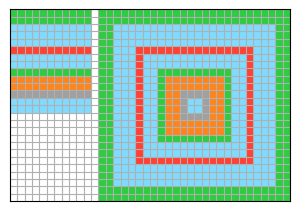

45a5af55 <rules_summary>
The transformation is defined as creating nested frames based on an input grid pattern, which is a set of horizontal lines of varying height and color.
</rules_summary>

<input_generation>
The input grid contains only horizontal parallel lines of different colors. These lines define the boundaries of the output frames. The line height varies from 1 to 5 pixels. This means that the each output frame boundary size can be from 1 to 5 pixels. Some lines can have the same color, but they must be separated by another line. A typical input grid size is 12-14 pixels. The bottom line defines the central solid square. For example, if the bottom line height is 2 pixels, this means that the output grid will have a 2x2 square in the center. The next line after bottom defines the next frame around this central square, and so on until the last horizontal line at the top of the input grid is used as final output frame.
</input_generation>

<solution_steps>
1. Identify the heig

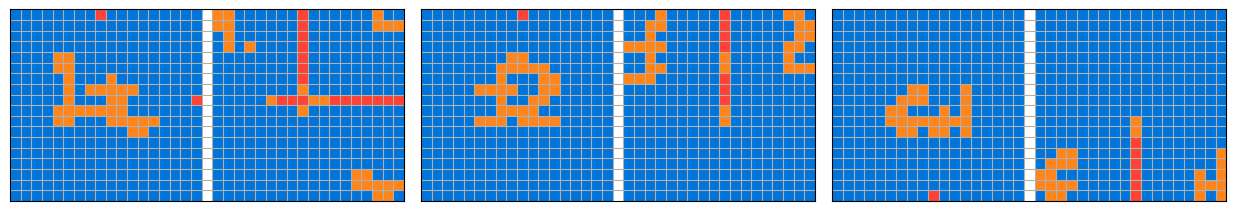

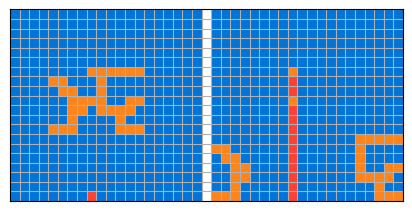

4a21e3da <rules_summary>
The transformation consists of two complex stages. First, drawing cutting lines from the control pixels to the main object, and second, moving the cut fragments to the edges of the grid.
</rules_summary>

<input_generation>
The input grid consists of two elements. First, a main object, located approximately in the center of the grid. Second, one or two control pixels, located at the two edges of the grid (horizontal or vertical). The main large object is formed as a connected component of randomly connected lines, frames, and pixels. The idea is to place this object under the intersection of imaginary lines drawn through two pixels. It should appear as if these lines divide the object into two or four parts. These parts will move according to the transformation rule.
</input_generation>

<solution_steps>
1. Identify the main object located approximately in the center of the grid.
2. Find the control pixels at the edges of the grid.
3. For each control pixel, be

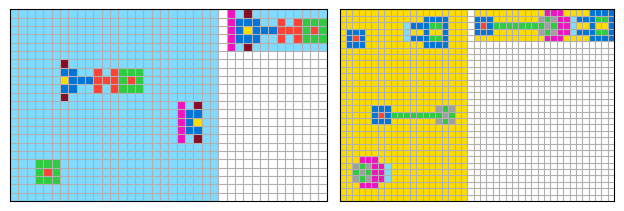

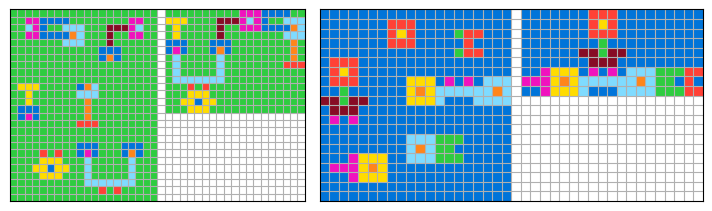

4e34c42c <rules_summary>
The transformation requires complex, multi-step reasoning to assemble the scattered fragments. The underlying connection rule is complex and relies on overlapping pixels at the edges of the fragments. This connection is not a simple matter of connecting two fragments; it requires an understanding of the common pattern between the fragments. Ultimately, the assembled fragments form an image, which is used as the output grid.
</rules_summary>

<input_generation>
The input grid consists of scattered fragments or puzzle pieces. Interestingly, these fragments are part of a larger image, but instead of being assembled like jigsaw puzzle pieces, they are aligned with shared pixels along the edges. Furthermore, each fragment is drawn in multiple colors to simplify the matching process. Ultimately, all the fragments should be connected to form an output grid with the same background but a much smaller size, as the resulting image, composed of different fragments, is muc

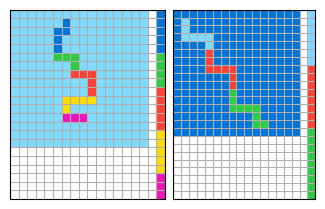

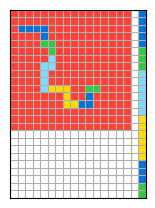

7b5033c1 <rules_summary>
The essence of the transformation is to straighten a broken line into a straight vertical line. You are given a broken colored line of pixels. You need to make this line vertically straight, preserving the order and number of the original colored pixels.
</rules_summary>

<input_generation>
The input grid has a random background and a single broken line on top of it. The line consists of 3-5 segments of different colors. Sometimes the single-color segment also has bends. The broken line is directed from the top to the bottom of the input grid, but sometimes it can go up 1-2 pixels.
</input_generation>

<solution_steps>
1. Find a colored line in the input grid.
2. Find the starting point of this line (usually at the top of the input grid).
3. Follow the path of this broken line with turns.
4. Remember the order and number of colors along the path.
5. Create the output grid as a straight vertical line. Use the colors from step 4. Create a vertical line from top t

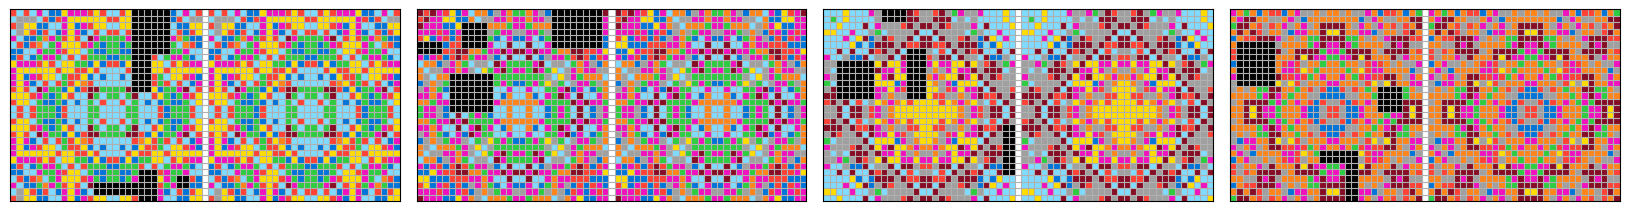

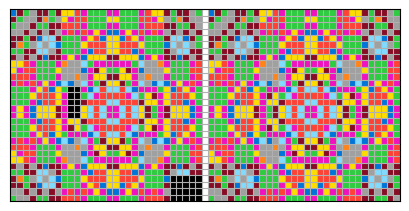

981571dc <rules_summary>
The transformation requires detecting symmetry and filling black pixels with a background mosaic pattern.
</rules_summary>

<input_generation>
The input grid is a colored mosaic with 4-way symmetrical patterns. On top of this mosaic are several black patches. The shape of the patches varies, but is mostly rectangles. Sometimes a patch is two rectangles joined together. The symmetry of the mosaic is determined by the pattern and can be offset left/right or up/down from the center of the input grid. The size of the input grid is large enough to include the overlapping mosaic pattern and several 2-5 patches ranging in size from 2 to 30 pixels.
</input_generation>

<solution_steps>
1. Identify the center of the mosaic pattern. Recognize left-to-right and top-to-bottom symmetry. The symmetry center may be offset from the center of the input grid.
2. Find all the black patches. Most of them are rectangular, but it is enough to find only the black pixels.
3. Reconstru

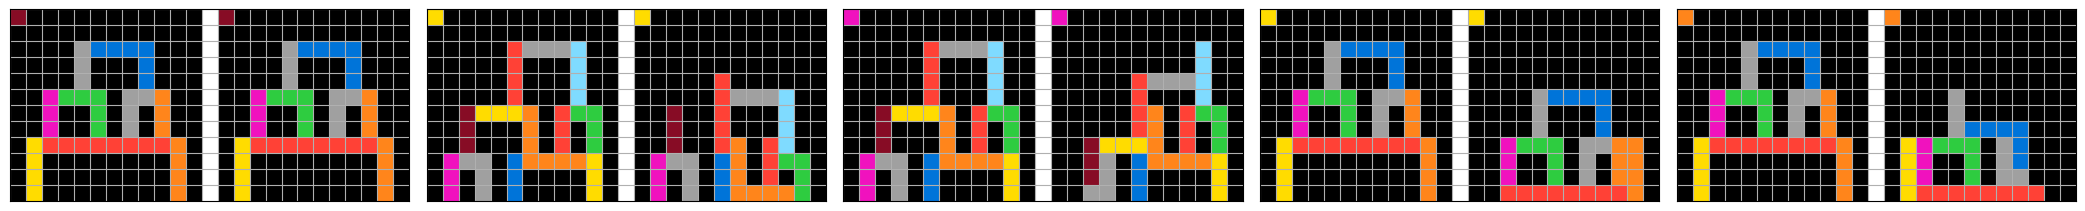

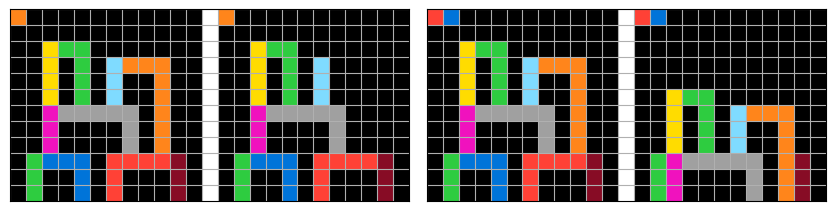

b6f77b65 <rules_summary>
The basic rule of the transformation is to predict the position of pixels after removing part of the scene. The control pixel in the upper left corner determines the color of the block that needs to be removed from the scene. After removing this block, the remaining blocks are subject to the gravity rule. As a result, the main task is to predict where the pixels will end up after this action.
</rules_summary>

<input_generation>
The input grid consists of two parts. The first part is the control pixel, located in the upper left corner. The second, main part is the object, located in the center of the input grid. This object consists of several colored blocks and is stand at the bottom of the input grid. Each block is of one color. The shape of the blocks is usually the L-shape or a simple line of several 2-4 pixels. The blocks are located one above the other. The object looks like a house built from multi-colored blocks, logs, etc. The color of the control pixe

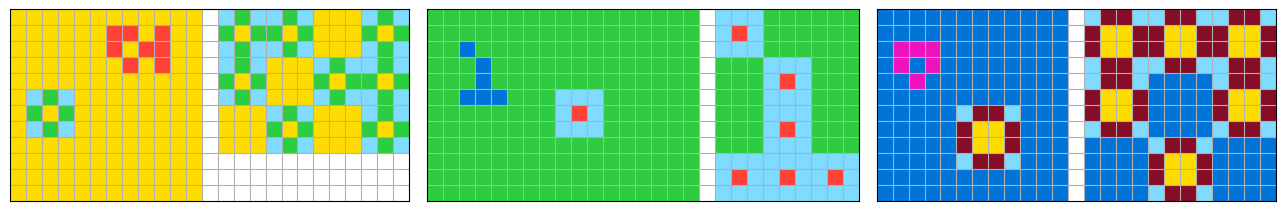

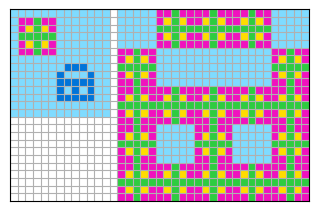

bf45cf4b <rules_summary>
The transformation rule is to build a new grid based on a given shape and a basic building block. You need to classify the two input objects into control and building block by symmetry and used colors.
</rules_summary>

<input_generation>
The input grid has a random background color. There are two types of objects in the input grid. The first object controls the shape and structure of the output grid. The second object defines the basic block used to build the output grid. The control object is a rectangular shape of one color with a few randomly removed pixels. The building block is symmetrical in four directions and consists of several different colors. This means it is square, it looks the same when rotated at any angle. The size of the square object is usually 3-5 pixels. The size of the control object is 3x5, 3x3, or 5x5 pixels in height x width.
</input_generation>

<solution_steps>
1. Identify two objects in the input grid. The first is symmetrical with 

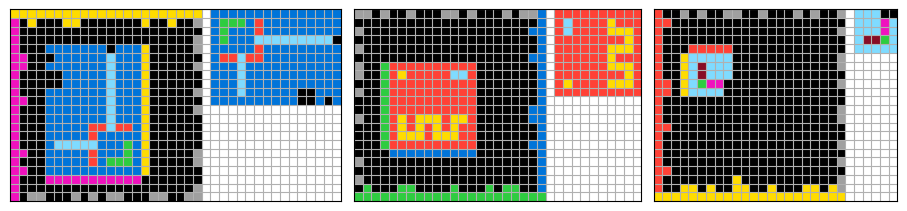

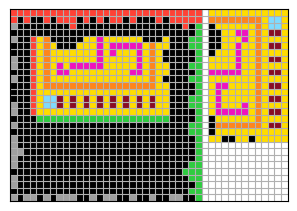

fc7cae8d <rules_summary>
The basic rule of transformation is to align the central object with the control lines located on the border of the input grid. There are two control lines on the edge of the grid, and the corresponding lines on the edge of the main object. The main task is to align the lines of the same color. This may require simultaneous mirroring and rotation.
</rules_summary>

<input_generation>
The input grid is represented as a picture in a frame. In the center of the grid is the main object, and on the edges is the frame. The main object has a random shape, mostly rectangular, and contains random shapes and pixels inside. These random pixels make the object unique when mirrored or rotated. The frame can also have different shapes. It can have a solid line along the border or a dotted line with a gap. If the border line is solid, it means that this line is a control. Otherwise, the line with gaps does not control anything. If the line is solid, it has a unique color. It 

In [338]:
data_dir = '/home/xd/projects/ARC-AGI-2/data/evaluation'
for pid in puzzle_ids[:]:
    task = Task(pid, json.load(open(f'{data_dir}/{pid}.json')))
    show_examples(task.train.examples); show_examples(task.test.examples)
    print(pid, df[df['puzzle_name'] == pid]['completion'].item())

7b80bb43


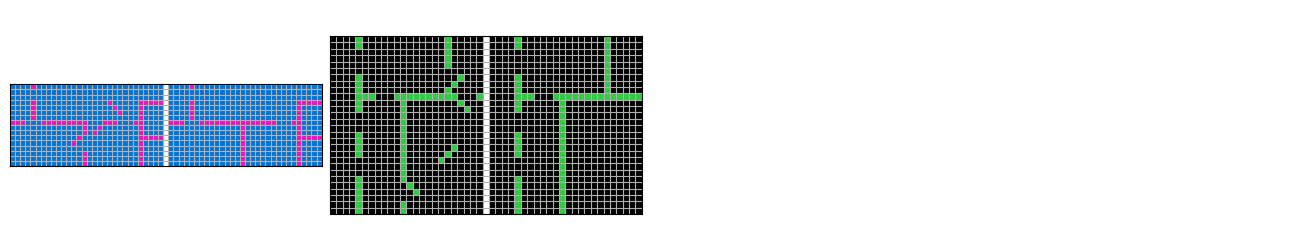

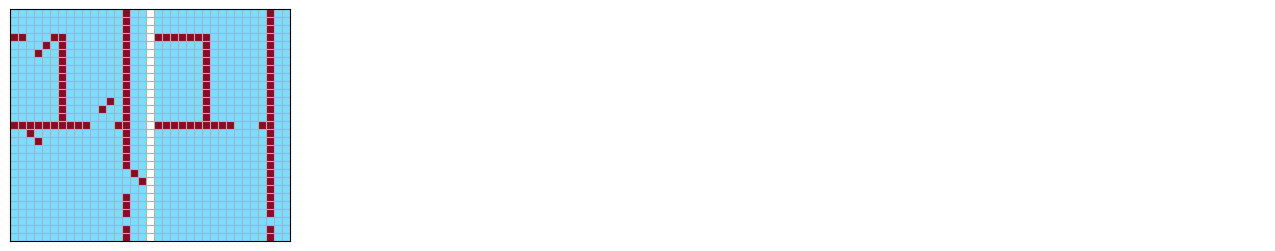

<puzzle_analysis>

## Pair 1 Analysis:

**Input grid:**
- Dimensions: 16x30
- Colors: 1 (blue) and 6 (magenta)
- Background color: 1 (blue)
- Notable features:
  - Row 7 contains: `666111666666666111666111661111` - a horizontal line with some gaps
  - Several vertical patterns of 6s in various columns
  - Column 4 has 6s at rows 0, 3, 4, 5, 6
  - Column 23 has 6s at multiple rows (4-15)
  - There appear to be scattered/irregular 6s in the middle section

**Output grid:**
- Same dimensions: 16x30
- Same colors: 1 and 6
- Row 7 becomes: `666111666666666666666111661111` - more continuous
- The scattered 6s in the middle section are regularized
- Vertical lines of 6s appear more uniform

**Transformation observations:**
- Row 7: The gap around positions 15-17 (which was `111`) is filled to become `666`, making a more continuous horizontal line
- Various vertical columns: The 6s are aligned to form straighter vertical lines
- Irregular/stray 6s are either removed or aligned to fit the main 

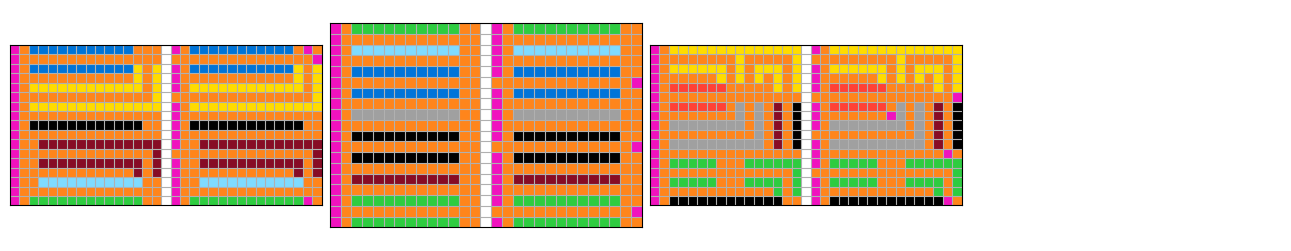

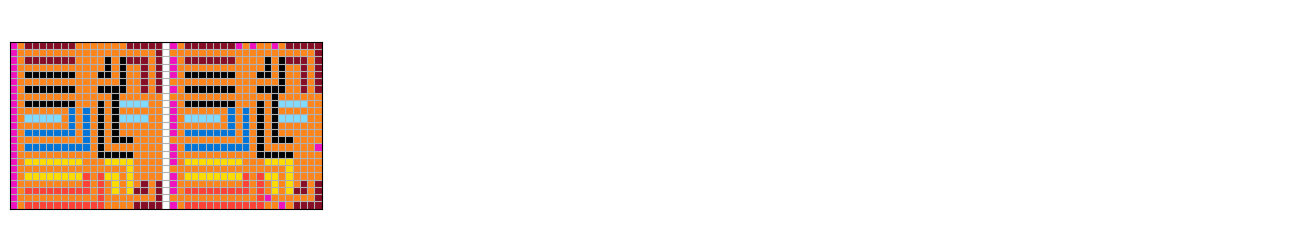

<puzzle_analysis>

Let me carefully analyze each input-output pair to identify the transformation pattern.

## Pair 1 Analysis:

**Input structure:** 17x16 grid
- Each row starts with 6 (left border)
- Contains horizontal bars of different colors (1, 4, 0, 9, 8, 3)
- Rows filled with 7s separate colored bars
- Some colored bars appear multiple times

**Identifying patterns in rows:**
- Rows 0, 2: contain 1s (different end patterns)
- Rows 4, 6: contain 4s (different end patterns)
- Row 8: contains 0s (unique)
- Rows 10, 12: contain 9s (different end patterns)
- Row 14: contains 8s (unique)
- Row 16: contains 3s (unique)

**Changes in output:**
- Row 0: position 14 changes from 7→6
- Row 1: first position 6→7, last position 7→6
- Row 5: first position 6→7
- Row 11: first position 6→7
- Row 16: position 14 changes from 7→6

**Pattern observation:** When consecutive rows contain the same colored pattern (like rows with 1s, or rows with 4s, or rows with 9s), the separator row between them 

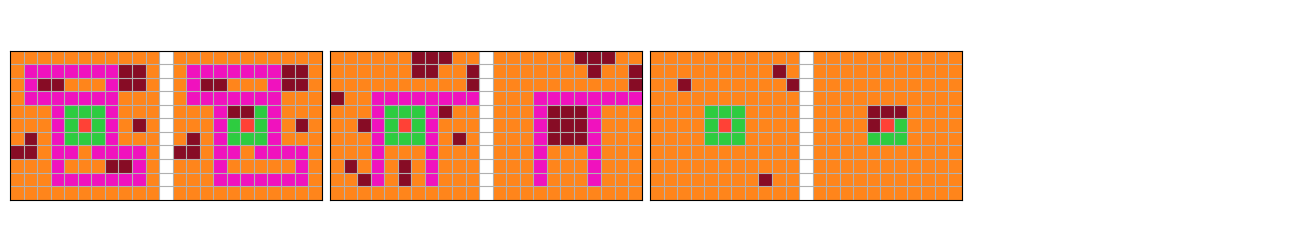

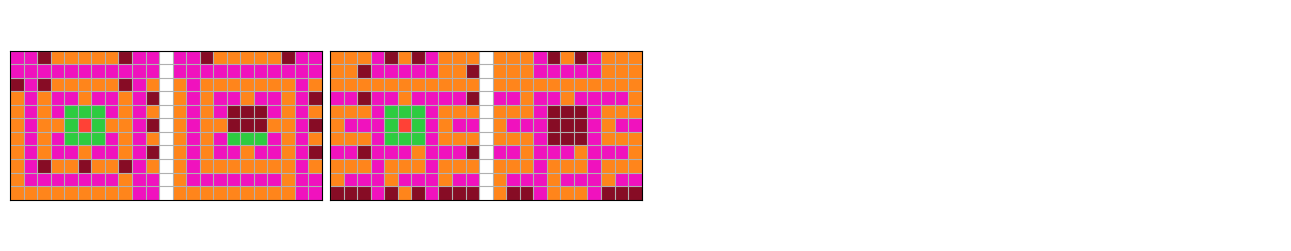

<puzzle_analysis>

Let me systematically analyze each input-output pair to understand the transformation.

## Pair 1 Analysis:

**Input Grid (11x11):**
- Colors present: 2, 3, 6, 7, 9
- There's a 3x3 block at rows 4-6, cols 4-6 with pattern:
  ```
  333
  323
  333
  ```
- Color 9 appears scattered: row 1 cols 9-10, row 2 cols 2-3 and 9, row 5 col 9, row 6 col 0, row 7 cols 0-1 and 9-10, row 8 cols 9-10

**Output Grid (11x11):**
- The 3x3 block becomes:
  ```
  993
  323
  333
  ```
- Row 8 changes: `77767779967` → `77767777767` (the 99 becomes 77)
- Other scattered 9s remain mostly unchanged

**Key observation:** The top row of the 3x3 block changed from 333 to 993, and some 9s outside the block were converted to 7s.

## Pair 2 Analysis:

**Input Grid (11x11):**
- Colors: 2, 3, 6, 7, 9
- 3x3 block at rows 4-6, cols 4-6:
  ```
  333
  323
  333
  ```
- 9s scattered throughout

**Output Grid:**
- Colors: only 6, 7, 9 (colors 2 and 3 removed!)
- The 3x3 block becomes:
  ```
  999
  999
 

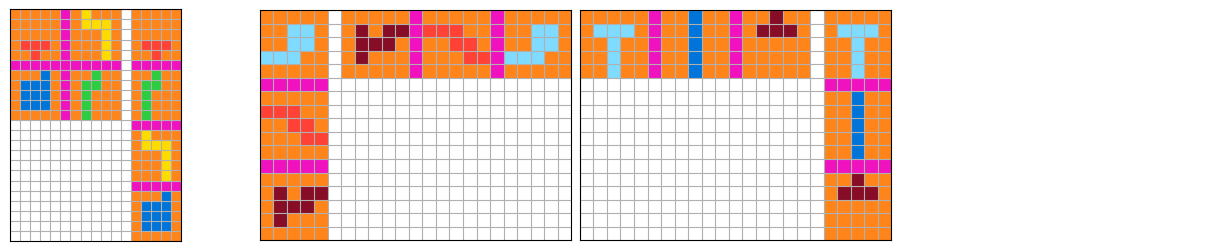

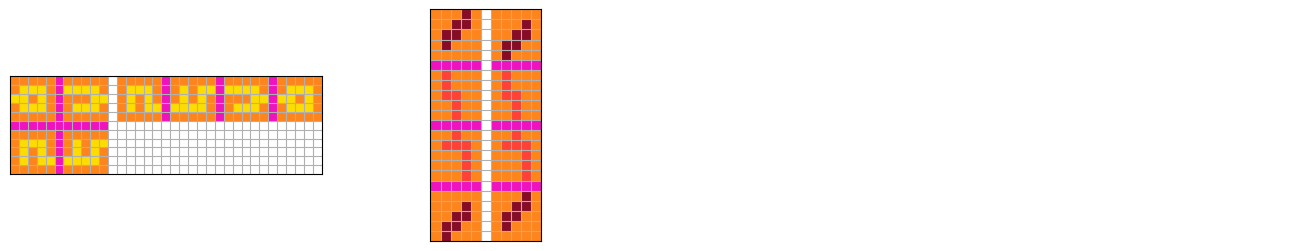

<puzzle_analysis>

## Examining Each Pair

### Pair 1 (11x11 → 23x5)

Input has a cross-shaped separator made of 6s:
- Vertical line of 6s at column 5
- Horizontal line of 6s at row 5

This creates 4 quadrants:
- Upper-left (rows 0-4, cols 0-4): 77777/77777/77777/72227/77277
- Upper-right (rows 0-4, cols 6-10): 74777/74447/77747/77747/77747
- Lower-left (rows 6-10, cols 0-4): 77717/71117/71117/71117/77777
- Lower-right (rows 6-10, cols 6-10): 77377/73377/73777/73777/73777

Output stacks these vertically with 66666 separators:
- Rows 0-4: Upper-left
- Row 5: 66666
- Rows 6-10: Lower-right
- Row 11: 66666
- Rows 12-16: Upper-right
- Row 17: 66666
- Rows 18-22: Lower-left

Order: UL → LR → UR → LL

### Pair 2 (17x5 → 5x17)

Input has horizontal separators at rows 5 and 11, creating 3 sections:
- Section 1 (rows 0-4): 77777/77887/77887/88877/77777
- Section 2 (rows 6-10): 77777/22277/77227/77722/77777
- Section 3 (rows 12-16): 77777/79799/79997/79777/77777

Output arranges them horizontall

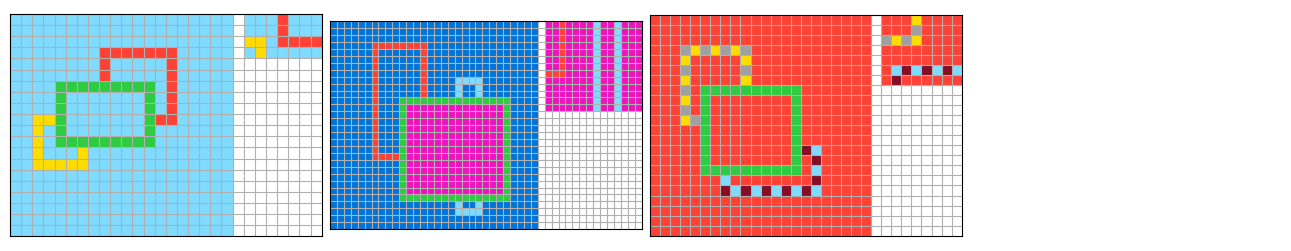

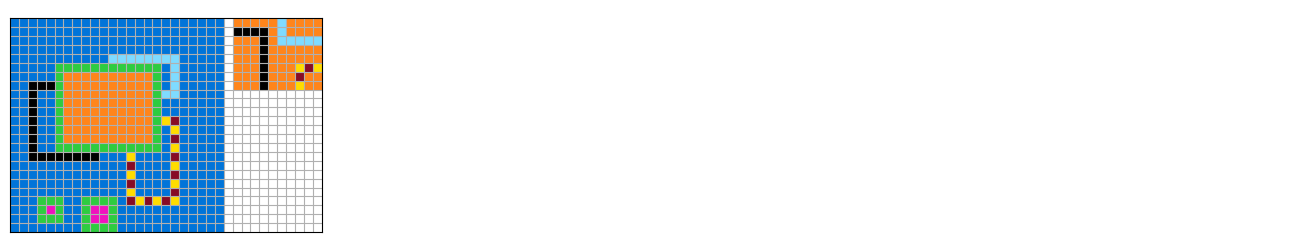

<puzzle_analysis>

## Pair 1 Analysis:
Input: 20x20, colors [2, 3, 4, 8]
Output: 4x7, colors [2, 4, 8] (note: color 3 is removed)

Examining the input grid:
- Background color is 8 (sky)
- Color 3 (green) forms rectangular frame boundaries at multiple locations
- Color 2 (red) appears in a rectangular pattern (rows 3-5, cols 8-14)
- Color 4 (yellow) appears in another pattern (rows 9-13, cols 2-5)

Tracing the green (3) frames:
- Frame 1: rows 6-11, forms a rectangle from cols 5-13
- Frame 2: rows 11-13 overlaps and connects

Inside/intersecting with these frames:
- Red rectangle at rows 3-5
- Yellow patterns at rows 9-13
- Various other colored pixels

The output (4x7) appears to be a combination of patterns that were inside or intersecting with the green frames, with the green frames themselves removed.

## Pair 2 Analysis:
Input: 30x30, colors [1, 2, 3, 6, 8]
Output: 13x14, colors [2, 6, 8] (color 3 removed, color 1 also removed)

Input structure:
- Background is 1 (blue)
- Red (2) 

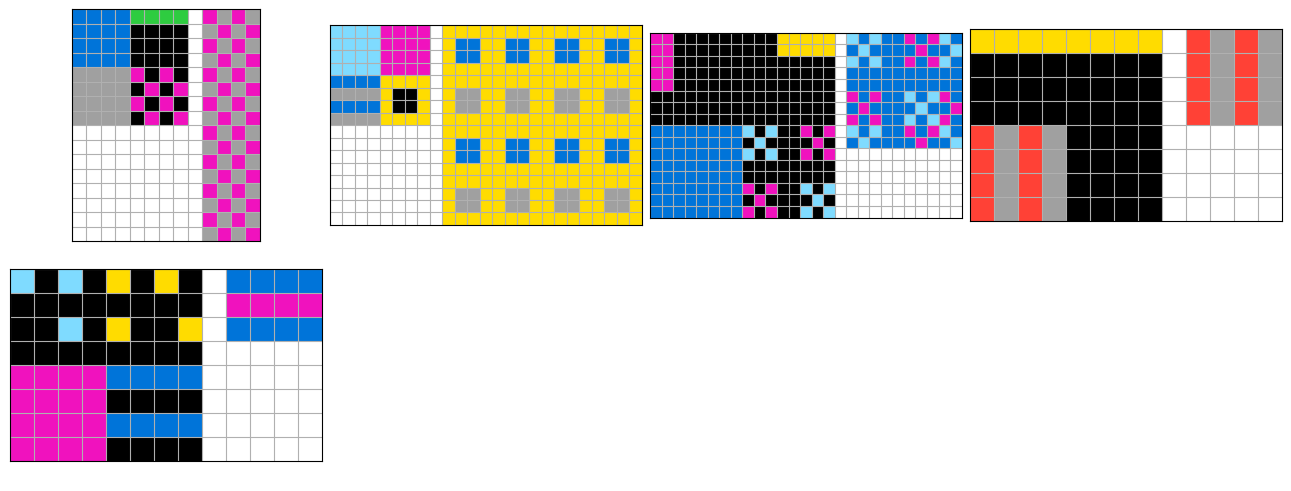

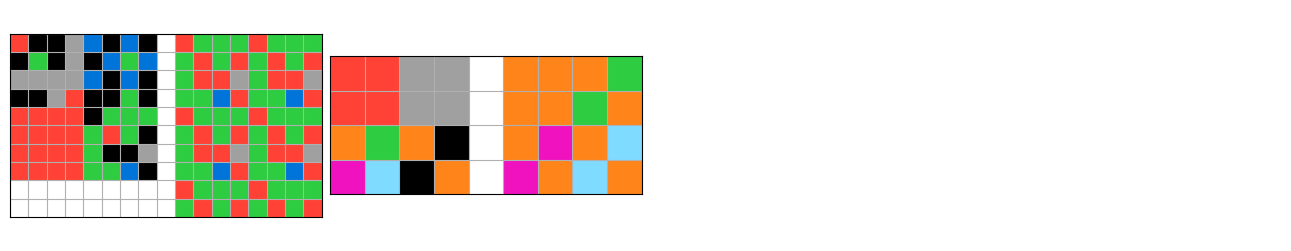

<puzzle_analysis>

Let me carefully analyze each input-output pair:

**Pair 1:**
- Input: 8x8 grid divided into quadrants
  - Top-left (4x4): all 1s
  - Top-right (4x4): 3s and 0s
  - Bottom-left (4x4): all 5s  
  - Bottom-right (4x4): pattern of 6s and 0s (6060/0606 alternating)
- Output: 16x4 grid, checkerboard pattern alternating 6565/5656
- The output uses colors 5 and 6 (from bottom half), creates a checkerboard, and is 4 times taller than input height

**Pair 2:**
- Input: 8x8 grid divided into halves
  - Top half: 8s on left, 6s on right (solid blocks)
  - Bottom half: Left has 1s and 5s in blocks, right has 4s and 0s with some pattern
- Output: 16x16 grid with 4 as background, pattern of 1s and 5s tiled
- Output is 2x the input dimensions

**Pair 3:**
- Input: 16x16 grid
  - Upper portion: 6s, 4s, and 0s
  - Lower portion: 1s and pattern of 6s, 8s, 0s
- Output: 10x10 grid with colors 1, 6, 8 in a complex pattern

**Pair 4:**
- Input: 8x8 grid
  - Top row: all 4s
  - Rows 1-3: a

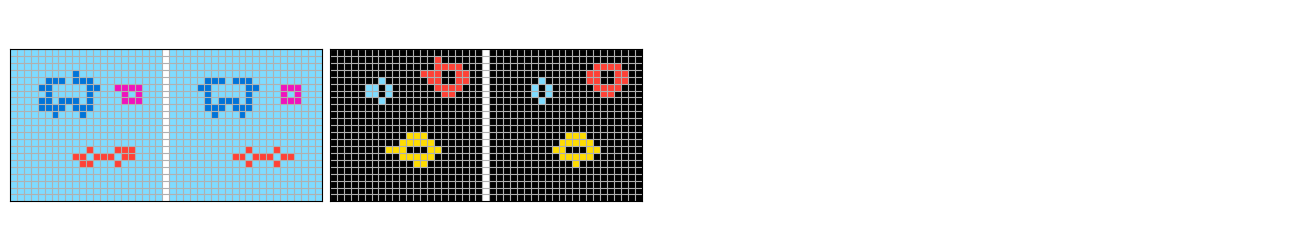

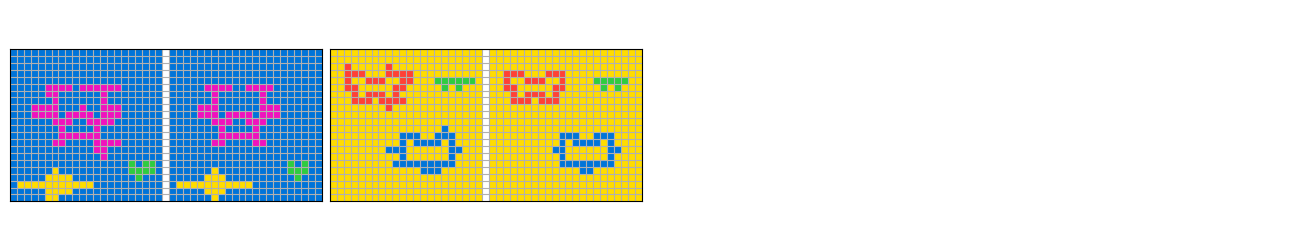

<puzzle_analysis>

Let me analyze each input-output pair systematically.

## Pair 1 Analysis:
- Input/Output: Both 22x22, colors [1, 2, 6, 8]
- Background color: 8 (sky blue)
- Three distinct colored patterns visible:
  1. Blue (1) pattern in rows 3-9, columns ~6-11
  2. Magenta (6) pattern in rows 5-7, columns ~17-19
  3. Red (2) pattern in rows 14-16, columns ~10-17

Specific changes from input to output:
- Row 3, col 9: 1 → 8 (single stray '1' removed)
- Row 5, col 16: 6 → 8 (removed from '6' pattern)
- Row 7, col 7: 1 → 8 (modified in '1' pattern)
- Row 14, col 16: 2 → 8 (removed from '2' pattern)
- Row 16, col 10: 2 → 8 (removed from '2' pattern)

Looking at the '1' pattern more closely, it appears to have vertical symmetry. The single '1' at row 3 breaks this symmetry and is removed.

For the '2' pattern, checking symmetry:
- Input row 14: ...828882228... 
- Output row 14: ...828882888...
- Input row 16: ...228882888...
- Output row 16: ...828882888...

The pattern is being made 

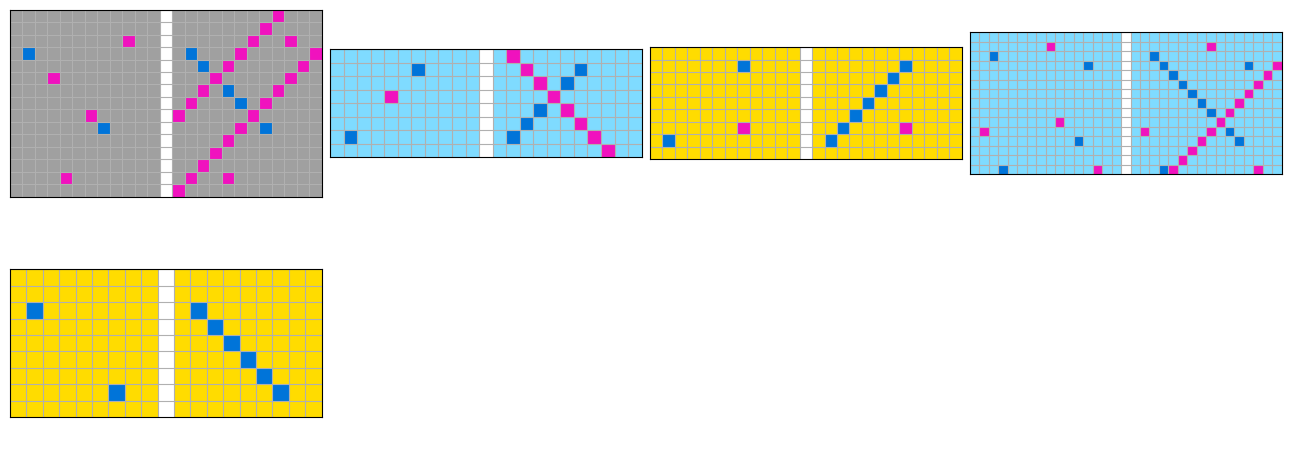

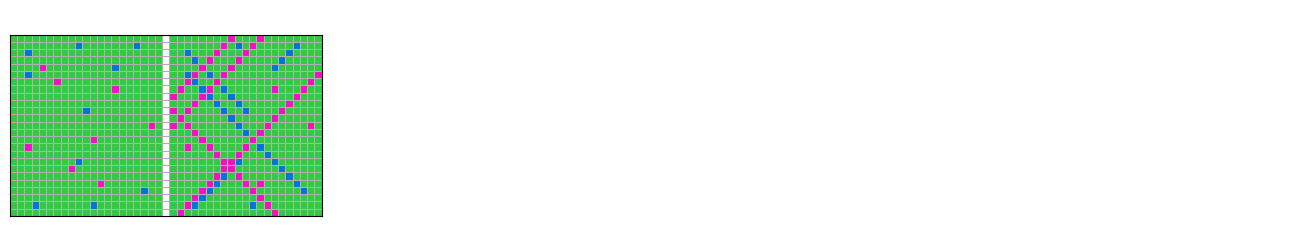

<puzzle_analysis>

Let me systematically analyze each input-output pair:

## Pair 5 (Simplest - 9x9 grid)
Input: Background is 4 (yellow) with:
- 1 (blue) at position [2,0]
- 1 (blue) at position [7,6]

Output: The two 1s are connected by a diagonal line of 1s:
- [2,0], [3,1], [4,2], [5,3], [6,4], [7,5], [7,6]

The diagonal moves down-right from [2,0] to connect to [7,6].

## Pair 3 (9x12 grid)
Input: Background is 4 (yellow) with:
- 1 (blue) at [1,6]
- 6 (magenta) at [6,6]
- 1 (blue) at [7,0]

Output: 
- The two 1s are connected by a diagonal: [1,6], [2,5], [3,4], [4,3], [5,2], [6,1], [7,0]
- The 6 at [6,6] remains isolated (only one 6, so no connection)

## Pair 2 (8x11 grid)
Input: Background is 8 (sky) with:
- 1 (blue) at [1,6]
- 6 (magenta) at [3,4]
- 1 (blue) at [6,0]

Output: Looking at the output, I can trace:
- Diagonal connecting the two 1s
- Diagonal from the 6 extending in some direction

## Pair 1 (15x12 grid)
Input: Background is 5 (gray) with:
- 6s at [2,9], [5,3], [8,6]

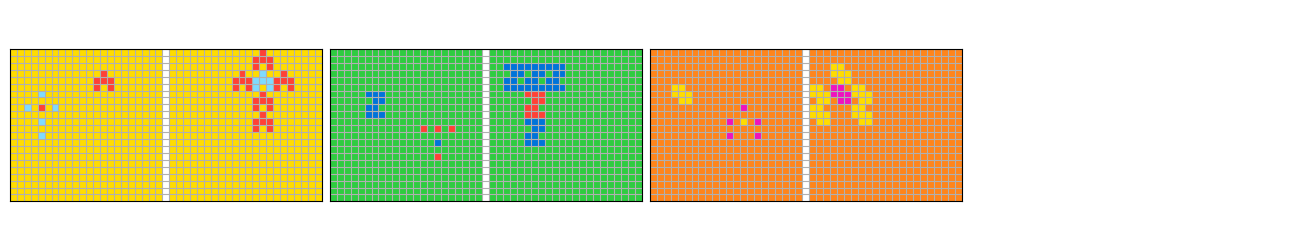

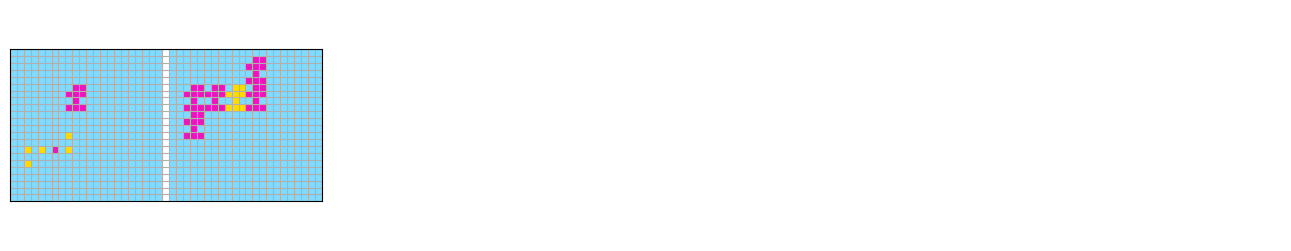

<puzzle_analysis>

## Detailed Grid-by-Grid Analysis

### Pair 1 Analysis

**Input:**
- 22x22 grid, colors: 2 (red), 4 (yellow), 8 (sky)
- Background: 4 (yellow)
- Small pattern at rows 3-5, cols 13-15:
  - Row 3: "2" at col 14
  - Row 4: "222" at cols 13-15
  - Row 5: "242" at cols 13-15
- Scattered "8" markers at:
  - (6, 4)
  - (8, 2), (8, 4), (8, 5)
  - (10, 4)
  - (12, 4)

**Output:**
- Same dimensions
- The 3x3 pattern appears replicated multiple times
- Pattern appears at rows 0-2 (centered around col 13)
- Pattern appears at rows 3-5 with "8" in center (cols 11-17, forming a larger 3x7 structure)
- Pattern appears at rows 6-8 (centered around col 13)
- Pattern appears at rows 9-11 (centered around col 13)

**Observation:** The small red/yellow pattern gets replicated at positions corresponding to where the "8" markers were in the input.

### Pair 2 Analysis

**Input:**
- 22x22 grid, colors: 1 (blue), 2 (red), 3 (green)
- Background: 3 (green)
- Pattern at rows 6-9, cols 5-7 wit

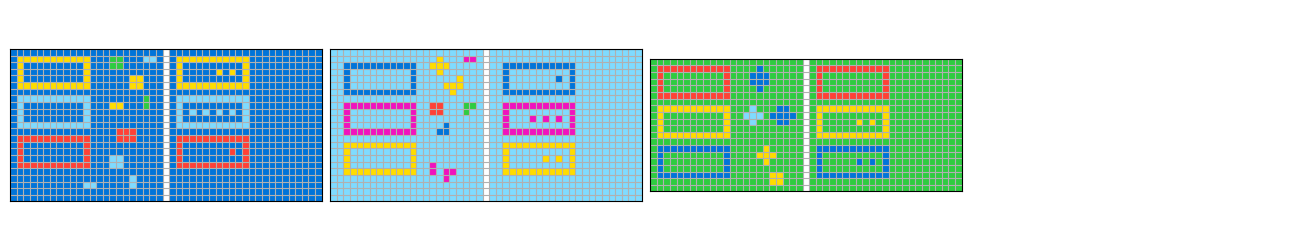

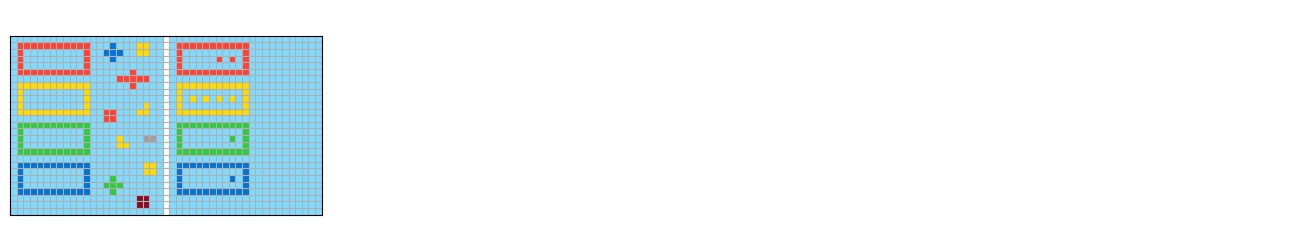

<puzzle_analysis>

## Pair 1 Analysis

**Input (23x23):**
- Colors: 1 (blue/background), 2 (red), 3 (green), 4 (yellow), 8 (sky)
- Three rectangular bordered structures visible:
  - Yellow (4) bordered box at rows 1-5, cols 1-11
  - Sky (8) bordered box at rows 7-11, cols 1-11  
  - Red (2) bordered box at rows 13-17, cols 1-11
- Scattered colored pixels outside these boxes (colors 2, 3, 4, 8)

**Output (23x23):**
- Colors: 1, 2, 4, 8 (color 3 removed)
- Same three rectangular boxes remain
- All scattered pixels outside boxes are removed
- New patterns appear inside boxes:
  - Row 3 yellow box: `14111114141411111111111` (alternating 4-1 pattern inside)
  - Row 9 sky box: `18181818181811111111111` (alternating 8-1 pattern inside)
  - Row 15 red box: `12111111121211111111111` (alternating 2-1 pattern inside)

**Correlation check:**
- Input row 3 had outside markers (`33` at cols 14-15) → pattern added at row 3 in yellow box
- Input row 9 had outside markers (`44`, `11`, `11`) → pattern a

In [ ]:
for pid in random.sample(puzzle_ids, 10):
    task = Task(pid, json.load(open(f'{data_dir}/{pid}.json')))
    show_examples(task.train.examples); show_examples(task.test.examples)
    print(pid, df[df['puzzle_name'] == pid]['completion'].item())

In [ ]:
data_root = Path('/home/xd/projects/ARC-AGI/data')
all_tasks0 = {}
for split in ('training', 'evaluation'):
    split_dir = data_root / split
    for json_path in split_dir.glob('*.json'):
        puzzle_id = json_path.stem
        with json_path.open() as f: all_tasks0[puzzle_id] = json.load(f)

In [227]:
data_root = Path('/home/xd/projects/ARC-AGI-2/data')
all_tasks2 = {}
for split in ('training',):
    split_dir = data_root / split
    for json_path in split_dir.glob('*.json'):
        puzzle_id = json_path.stem
        with json_path.open() as f: all_tasks2[puzzle_id] = json.load(f)
all_tasks2 = {pid: v for pid, v in all_tasks2.items() if pid not in all_tasks0}; len(all_tasks2)
all_tasks2 = {puzzle_id: Task(puzzle_id, task) for puzzle_id, task in all_tasks2.items()}

233

In [ ]:
all_tasks = {puzzle_id: Task(puzzle_id, task) for puzzle_id, task in all_tasks0.items()}

In [81]:
task = all_tasks['05f2a901']

In [154]:
def show_color_pcts(color_pcts):
    return [(color_names[c] if not isinstance(c, str) else c, round(p, 3)) for c, p in color_pcts]
def avg_dicts(dicts): 
    return {k: sum(d.get(k, 0) for d in dicts) / len(dicts) 
        for k in join_lists([list(d.keys()) for d in dicts], dedup=True)}

In [ ]:
tasks = {}
for puzzle_id, task in all_tasks.items():
    if task.train.examples[0].input.background_color is None: continue
    assert task.train.is_shape_aligned
    examples = task.train.examples
    for i, e in enumerate(task.train.examples):
        inp_top_color = e.input.color_pcts[0][0]
        out_top_color = e.output.color_pcts[0][0]
        assert inp_top_color == e.input.background_color
        maybe_bg_colors = e.output.array[e.input.array == inp_top_color]
        color_cnt = Counter(maybe_bg_colors).most_common()

        color_cnt = [(c, n / maybe_bg_colors.size) for c, n in color_cnt]
        color_cnt = OrderedDict(color_cnt)
        color_cnt['inp_top_color'] = color_cnt.get(inp_top_color, 0)
        color_cnt['out_top_color'] = color_cnt.get(out_top_color, 0)
        e.output.maybe_bg_color_pcts = color_cnt

        # e.output.maybe_bg_color_pcts = [(c, n / maybe_bg_colors.size) for c, n in color_cnt]
        # biased_bg_color_pcts = [(c, (n + (c == inp_top_color)) / maybe_bg_colors.size + 0.05 * (c == inp_top_color)) for c, n in color_cnt]
        # biased_bg_color_pcts = sorted(biased_bg_color_pcts, key=lambda x: x[1], reverse=True)
        # e.output.maybe_bg_color = biased_bg_color_pcts[0][0]

    avg_color_cnt = avg_dicts([e.output.maybe_bg_color_pcts for e in examples])
    avg_color_cnt['inp_top_color'] *= 1.05
    avg_color_cnt['out_top_color'] *= 1.01
    avg_color_cnt = sorted(avg_color_cnt.items(), key=lambda x: x[1], reverse=True)
    if avg_color_cnt[0][0] in ['inp_top_color', ]:
        pass
    # if puzzle_id != '759f3fd3' and (
    #     all(e.output.maybe_bg_color == e.input.color_pcts[0][0] for e in examples) or
    #     all(e.output.maybe_bg_color == e.output.color_pcts[0][0] for e in examples) or 
    #     all(e.output.maybe_bg_color == examples[0].output.maybe_bg_color for e in examples)
    # ):
    #     for e in examples:
    #         e.output.background_color = e.output.maybe_bg_color
    else:
        tasks[task.puzzle_id] = task
        print(task.puzzle_id)
        print(show_color_pcts(avg_color_cnt))
        # print([color_names[e.output.maybe_bg_color] for e in examples])
        # print([color_names[e.input.color_pcts[0][0]] for e in examples])
        # print([color_names[e.output.color_pcts[0][0]] for e in examples])
        # for e in examples:
        #     print(show_color_pcts(e.output.maybe_bg_color_pcts))
        show_examples(examples)
len(tasks)

In [ ]:
for task in tasks1: print(task.puzzle_id); show_examples(task.train.examples)

41ace6b5


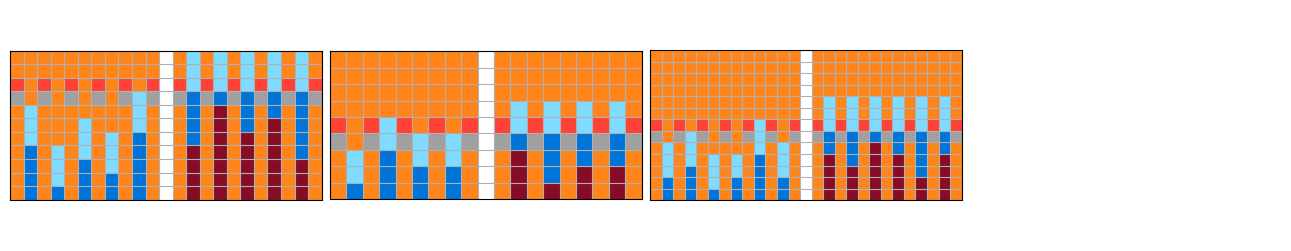

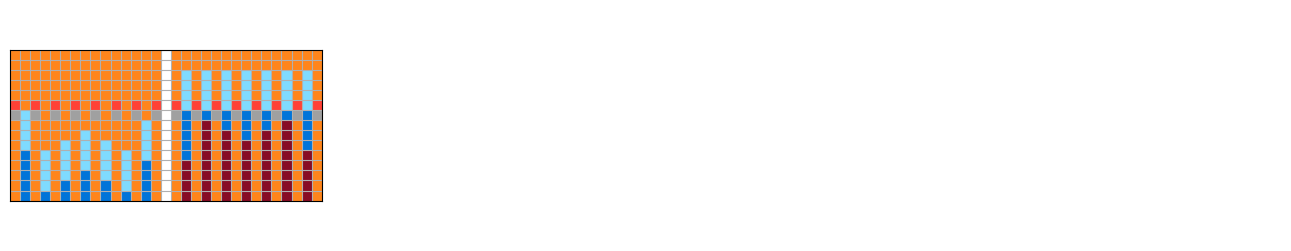

In [235]:
task = random.choice(list(all_tasks2.values()))
avgs = []
if True: # for task in all_tasks2.values():
    print(task.puzzle_id); show_examples(task.train.examples); show_examples(task.test.examples)
#     examples = task.train.examples + task.test.examples
#     # avg = sum((e.input.array == Color.BLACK).sum() for e in examples) / sum(e.input.array.size for e in examples)
#     avg = sum(((e.input.array.size + e.output.array.size) / 2)**0.5 for e in examples) / len(examples)
#     avgs.append(avg)
# print(np.mean(avgs))

0.4523809523809524
0.6
0.5


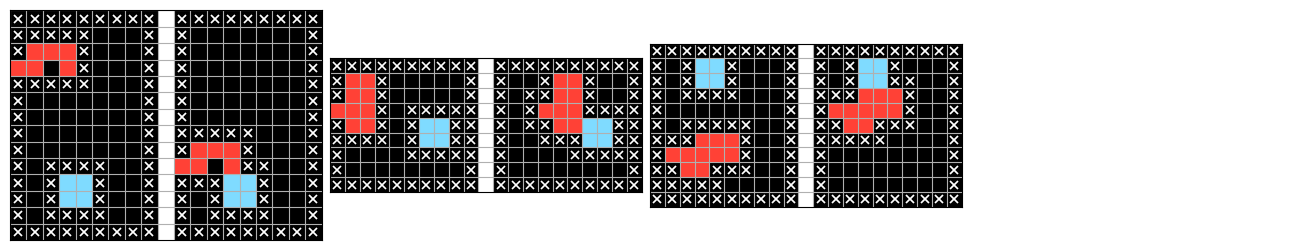

In [114]:
ns = (3, 3)
for e in task.train.examples:
    qmatched = set([qc for qc in e.output.cells for kc in e.input.cells 
        if qc.color == e.input.background_color and qc.cc_neighbors(True, neighborhood_size=ns) == kc.cc_neighbors(True, neighborhood_size=ns)
        ])
    kmatched = set([kc for qc in e.output.cells for kc in e.input.cells 
        if qc.color == e.input.background_color and qc.cc_neighbors(True, neighborhood_size=ns) == kc.cc_neighbors(True, neighborhood_size=ns)
        ])
    print(len(qmatched) / len(e.output.cells))
    e.input.labeled_cells = list(kmatched)
    e.output.labeled_cells = list(qmatched)
    # show_colored_grid_combined(e, input_cells=list(kmatched), output_cells=list(qmatched),
    #     input_markers='x', output_markers='x')
show_examples(task.train.examples, input_markers='x', output_markers='x')

In [ ]:
ncols = 4  # change as desired
for task in random.sample(tasks, len(tasks)):
    print(task.puzzle_id, [e.input.color_counts[0][1] / e.input.array.size for e in task.train.examples]) 
    examples = task.train.examples
    rows = math.ceil(len(examples) / ncols)
    fig, axes = plt.subplots(rows, ncols, figsize=(3.2 * ncols, 2.4 * rows), constrained_layout=True)
    axes = np.atleast_2d(axes).ravel()

    for ax, example in zip(axes, examples):
        combined = concat_side_by_side(example.input.array, example.output.array, sep=1)
        show_colored_grid(np.array(combined).T, text=False, ax=ax)

    for ax in axes[len(examples):]: _ = ax.axis('off')
    plt.show()

In [ ]:
ncols = 4  # change as desired
for puzzle_id, task in list(tasks.items()):
    # if puzzle_id != "77fdfe62": continue
    print(puzzle_id)
    # for pair in task['train']:
    #     print({k: np.array(pair[k]).shape for k in pair if k in ('input', 'output') and 
    #            k not in ['input_sep_color_pct', 'input_num_subgrids', 'output_num_subgrids']})
    # for pair in task['test']:
    #     print({k: np.array(pair[k]).shape for k in pair if k in ('input', 'output')}, 'test')
               
    pairs = task['train']
    rows = math.ceil(len(pairs) / ncols)
    fig, axes = plt.subplots(rows, ncols, figsize=(3.2 * ncols, 2.4 * rows), constrained_layout=True)
    axes = np.atleast_2d(axes).ravel()

    for ax, pair in zip(axes, pairs):
        combined = concat_side_by_side(pair['input'], pair['output'], sep=1)
        show_colored_grid(np.array(combined).T, text=False, ax=ax)

    for ax in axes[len(pairs):]: _ = ax.axis('off')
    plt.show()